### <font color=black>Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

### <font color=black>Reading Data set

In [3]:
df=pd.read_csv("loan.csv")

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### <font color=black>Metadata:Getting information about structure of dataset.

In [5]:
df.shape

(39717, 111)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [8]:
#As can be seen, there are many null values and identification columns, we first need to clean the data.

### <font color=black> Checking Null values

In [9]:
#Checking null values
round(100*(df.isnull().sum()/len(df.index)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

### <font color=black>Dropping null values

<font color=green>**1. Remove columns containing Null values in all the rows**

In [10]:
#Dropping columns with all NA values since that won't provide any information and won't be of any use.
df.dropna(axis=1,how='all',inplace=True)

<font color=green>**2. Remove columns containing more than 50% missing values**

In [11]:
#dropping columns with more than 50% missing values as imputing them won't be practically correct
df = df.drop('next_pymnt_d', axis=1)
df = df.drop('mths_since_last_delinq', axis=1)
df = df.drop('mths_since_last_record', axis=1)

<font color=green>**3. Remove rows containing Loan status of "Current"**

In [12]:
#we need to analyze reasons of default. hence we can drop loans which are currently running-
df=df[df.loan_status != 'Current']

<font color=darkpink>**Checking columns with unique values.**

In [13]:
#After removing the rows of "Current" loans, checking columns having unique values and removing them as they won't be of use in analysis.

In [14]:
df.astype('object').describe(include='all').loc['unique', :]

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

<font color=darkpink>**Removing the above listed columns with unique values**

In [15]:
#removing these columns having only one type of data
df = df.drop(['pymnt_plan','initial_list_status','out_prncp','out_prncp_inv','application_type','policy_code','acc_now_delinq','delinq_amnt','tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths'],axis=1)

In [16]:
df.astype('object').describe(include='all').loc['unique', :]

id                         38577
member_id                  38577
loan_amnt                    870
funded_amnt                 1019
funded_amnt_inv             8050
term                           2
int_rate                     370
installment                15022
grade                          7
sub_grade                     35
emp_title                  28027
emp_length                    11
home_ownership                 5
annual_inc                  5215
verification_status            3
issue_d                       55
loan_status                    2
url                        38577
desc                       25803
purpose                       14
title                      19297
zip_code                     822
addr_state                    50
dti                         2853
delinq_2yrs                   11
earliest_cr_line             524
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21275
revol_util

In [17]:
#All the unique value containing columns have been removed

<font color=green>**4. Remove the column "desc" since Purpose covers the customer's need for loan.**

In [18]:
#Dropping the 'desc' clumn since there are ~32% missing values and we won't be able to impute them accurately.
#Also, the 'purpose' column is there to know why customer applied for loan
df = df.drop('desc', axis=1)

<font color=green>**5. Remove the columns "id","member_id"  "url" and "zip_code"**

In [19]:
#checking duplicate loan applications by same customer
print("Duplicates in member id:",any(df['member_id'].duplicated()))
print("Duplicates in loan id:",any(df['id'].duplicated()))
print("Duplicates in url:",any(df['url'].duplicated()))

Duplicates in member id: False
Duplicates in loan id: False
Duplicates in url: False


In [20]:
#since we are required to predict loan default reasons, we can drop loan id and member id columns. As they are just identification
#numbers and won't contribute to our analysis. Similarly 'url' column also is unique to every customer so can be removed.
df=df.drop(['id','member_id','url'],axis=1)

In [21]:
df['zip_code'].head(5)

0    860xx
1    309xx
2    606xx
3    917xx
5    852xx
Name: zip_code, dtype: object

In [22]:
#the 'zip_code' column has last two digits hidden so we won't be able to identify districts correctly with it. Hence it will be removed.
df=df.drop(['zip_code'],axis=1)

<font color=green>**6. Remove the column "last_credit_pull_d"**

In [23]:
#Taking a look at 'last_credit_pull_d' column and it's meaning
df[['issue_d','last_pymnt_d','loan_status','last_credit_pull_d']].head(20)

,issue_d,last_pymnt_d,loan_status,last_credit_pull_d
0,Dec-11,Jan-15,Fully Paid,May-16
1,Dec-11,Apr-13,Charged Off,Sep-13
2,Dec-11,Jun-14,Fully Paid,May-16
3,Dec-11,Jan-15,Fully Paid,Apr-16
5,Dec-11,Jan-15,Fully Paid,Jan-16
6,Dec-11,May-16,Fully Paid,May-16
7,Dec-11,Jan-15,Fully Paid,Dec-14
8,Dec-11,Apr-12,Charged Off,Aug-12
9,Dec-11,Nov-12,Charged Off,Mar-13
10,Dec-11,Jun-13,Fully Paid,Dec-15


In [24]:
#It can be seen that last_credit_pull_d is available for both -"Charged off" and "Fully paid" loans.
#It's the information sought by LC regarding this loan and it won't make any effect on a person's default
#Hence this can be dropped
df=df.drop('last_credit_pull_d',axis=1)

<font color=green>**7. Remove the column "title"**

In [25]:
#purpose provides category of loan application and title elaborates that purpose for individual customer. 
#so we can use the 'purpose' column and 'title' can be dropped.
df=df.drop('title',axis=1)

### <font color=black> Formatting columns and Changing the data types to relevant ones

<font color=green>**1. Changing the data type date columns to datetype**

In [26]:
#converting all date columns to datetype
df['issue_d']=pd.to_datetime(df['issue_d'].str.upper(),format='%b-%y',yearfirst=False)
df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'].str.upper(),format='%b-%y',yearfirst=False)

<font color=green>**2. Dropping "%" from 'int_rate' column and create column 'int_rate_per'. Drop 'int_rate' column then**

In [27]:
df['int_rate_per']=df['int_rate'].str.rstrip('%')
df['int_rate_per']=df['int_rate_per'].astype(float)
df=df.drop('int_rate',axis=1)

<font color=green>**3. Dropping "months" from 'term' column and create column 'term_mths' and Drop 'term' column then**

In [28]:
df['term_mths']=df['term'].str.rstrip(' months')
df['term_mths']=df['term_mths'].astype(int)
df=df.drop('term',axis=1)

<font color=green>**4. Dropping "%" from 'revol_util' column and create 'revol_util_per' and Drop 'revol_util' column then.**

In [29]:
df['revol_util_per']=df['revol_util'].str.rstrip('%')
df['revol_util_per']=df['revol_util_per'].astype(float)
df=df.drop('revol_util',axis=1)

### <font color=black>Further cleaning the data by removing/imputing values

<font color=green>**1. Treating the missing values of 'emp_length' column**

In [30]:
#Checking the different types of values present in this column
df.groupby('emp_length').emp_length.count()

emp_length
1 year       3169
10+ years    8488
2 years      4291
3 years      4012
4 years      3342
5 years      3194
6 years      2168
7 years      1711
8 years      1435
9 years      1226
< 1 year     4508
Name: emp_length, dtype: int64

In [31]:
#Null value %
round(100*df['emp_length'].isnull().sum()/(len(df.index)),2)

2.68

In [32]:
#making the entries in 'emp_length' column consistent
df['emp_length'].replace('< 1 year','0 to 1 years',inplace=True)
df['emp_length'].replace('10+ years','10 or more years',inplace=True)
df['emp_length'].replace('1 year','1 years',inplace=True)

<font color=orange>**Checking the distribution of 'emp_length' or "Employment years" with 'annual_inc'.**

In [33]:
#Checking the distribution of annual income with employment years
#creating a new datfarame "inc" which has 'emp_length' as index and corresponding median values of 'annual_inc'
#As annual income is a parameter which can certainly explain the emplyment years in general
#dataframe "inc" is created just for analysing emp_length data
inc=df.pivot_table(index='emp_length',values='annual_inc',aggfunc='median')
inc.reset_index(inplace=True)

In [34]:
print(inc['emp_length'].dtype)

object


In [35]:
inc['emp_years']=inc['emp_length'].str.split(" ", n=-1, expand=True)[0]

In [36]:
inc

,emp_length,annual_inc,emp_years
0,0 to 1 years,50000.0,0
1,1 years,51996.0,1
2,10 or more years,69739.5,10
3,2 years,52000.0,2
4,3 years,55137.0,3
5,4 years,57998.0,4
6,5 years,57996.0,5
7,6 years,60000.0,6
8,7 years,60000.0,7
9,8 years,60000.0,8


In [37]:
inc['emp_years']=pd.to_numeric(inc['emp_years'])
inc=inc.sort_values(by='emp_years',ascending=True)

In [38]:
inc

,emp_length,annual_inc,emp_years
0,0 to 1 years,50000.0,0
1,1 years,51996.0,1
3,2 years,52000.0,2
4,3 years,55137.0,3
5,4 years,57998.0,4
6,5 years,57996.0,5
7,6 years,60000.0,6
8,7 years,60000.0,7
9,8 years,60000.0,8
10,9 years,65000.0,9


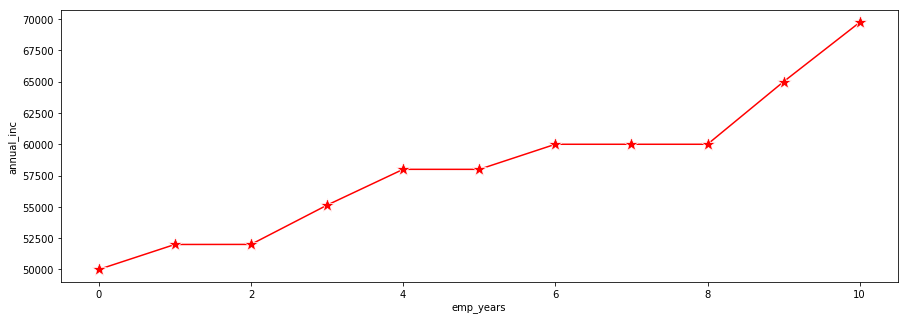

In [39]:
#plot of annual ncome w.r.t emp_years
plt.figure(figsize=(15,5))
sns.lineplot(x="emp_years",y="annual_inc" , marker="*",markersize=15,data=inc,color="red")
plt.show()

<font color=green>***It is evident that median annual_inc increases with Employment years***

<font color=darkpink>**Checking the distribution of 'annual_inc'.**

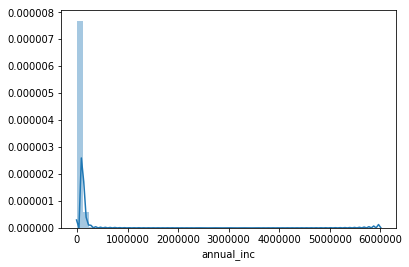

In [40]:
#Checking distribution of annual_inc
sns.distplot(df['annual_inc'])
plt.show()

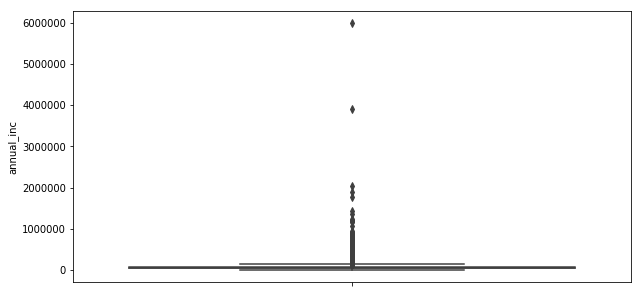

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df["annual_inc"])
plt.show()

In [42]:
#removing outliers: annual_inc>1000,000
print("No. of annual income values greater than 1000,000:","\n",df[df['annual_inc']>1000000].annual_inc.count())

No. of annual income values greater than 1000,000: 
 14


In [43]:
#% of annual income values greater than 1000,000
print("% of annual income values greater than 1000,000:",round((100*df[df['annual_inc']>1000000].annual_inc.count())/len(df.index),2))

% of annual income values greater than 1000,000: 0.04


In [44]:
#removing the annual income values >=1000000 since they're just 0.04% of total data and are outliers
df=df[df.annual_inc<=1000000]

In [45]:
round(100*(df[df['annual_inc']>1000000].annual_inc.count())/len(df.index),2)

0.0

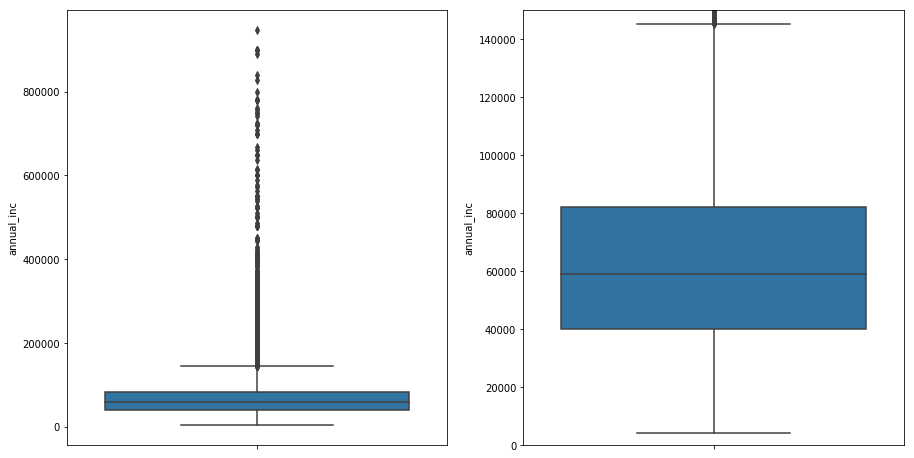

In [46]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(y=df["annual_inc"])

plt.subplot(1,2,2)
sns.boxplot(y=df["annual_inc"])
plt.ylim(0,150000)
plt.show()

In [47]:
round(100*len(df.loc[df['annual_inc']>200000])/len(df.index),2)

1.44

In [48]:
#Since only 1.44% values are above 200,000 annual_inc. These rows can be removed due to being outliers from our dataset.

In [49]:
#Keeping annual income of only lesss than 200000
df=df[df.annual_inc<=200000]

<font color=green>***50% of values are between 40,000 & 80,000.***

<font color=darkpink>**Creating bins of 'annual_inc' in new column 'annual_inc_range'.**

In [50]:
bins=[0,20000,40000,60000,80000,140000,200000]
slot=['0-20000','20000-40000','40000-60000','60000-80000','80000-140000','140000-200000']
df['annual_inc_range']=pd.cut(df['annual_inc'],bins,labels=slot)

In [51]:
round((100*df.groupby('annual_inc_range').loan_amnt.count())/len(df.index),2)

annual_inc_range
0-20000           3.10
20000-40000      22.41
40000-60000      29.63
60000-80000      20.05
80000-140000     21.21
140000-200000     3.59
Name: loan_amnt, dtype: float64

In [52]:
#Since 'emp_length' is in object format in the main dataframe- creating a new column 'emp_years' to present years of employment
df['emp_years']=df['emp_length'].str.split(" ", n=-1, expand=True)[0]
df['emp_years']=pd.to_numeric(df['emp_years'])

In [53]:
df['emp_years'].isnull().sum()

1025

In [54]:
#Defining conditions on 'annual_inc' to arrive at values for 'emp_years' based on the analysis conducted with "inc" dataframe

In [55]:
# define conditions and values
conditions=[df['annual_inc']<50000,df['annual_inc'].between(50000,52000),df['annual_inc'].between(52000,55000),df['annual_inc'].between(55000,58000),df['annual_inc']>58000]
values = [0,1,3,5,10]
# apply logic where company_type is null
df['emp_years']=np.where(df['emp_years'].isnull(),np.select(conditions,values),df['emp_years'])

In [56]:
df['emp_years'].isnull().sum()

0

In [57]:
#Similarly the missing values in 'emp_length' can also be imputed

In [58]:
# define conditions and values
conditions=[df['annual_inc']<50000,df['annual_inc'].between(50000,52000),df['annual_inc'].between(52000,55000),df['annual_inc'].between(55000,58000),df['annual_inc']>58000]
values = ['<1 years','1 years','3 years','5 years','10 years']
# apply logic where company_type is null
df['emp_length']=np.where(df['emp_length'].isnull(),np.select(conditions,values),df['emp_length'])

In [59]:
df['emp_length'].isnull().sum()

0

<font color=green>**2. Treating the missing values of 'emp_title' column**

In [60]:
#Imputing the null values in emp_title column with "unknown" since before 2013- emp_title was job title provided by borrower. 
#So it might be designation of him also. 
#We can't be certainly say that its employer name and its better to keep these fields as unknown
df['emp_title']=df['emp_title'].replace(np.nan,"unknown")

In [61]:
df['emp_title'].isnull().sum()

0

<font color=green>**3. Treating the missing values of 'last_pymnt_d' column**

In [62]:
#Checking the loan amount, total payment and recoveries where last_pymnt_d is blank by creating a new dataframe "df_nopay"
df_nopay=df.loc[df.last_pymnt_d.isnull()][['recoveries','total_pymnt']]
#Creating a new column "difference" which shows if there is any difference between loan recovery post chargeoff anf total_pymnt
df_nopay['difference']=df['recoveries']-df['total_pymnt']
df_nopay.head(10)

,recoveries,total_pymnt,difference
26,0.00,0.00,0.0
2724,0.00,0.00,0.0
3613,366.75,366.75,0.0
3985,0.00,0.00,0.0
4206,1800.00,1800.00,0.0
4803,86.05,86.05,0.0
5716,89.89,89.89,0.0
6253,62.86,62.86,0.0
6259,1719.57,1719.57,0.0
6768,179.57,179.57,0.0


In [63]:
df_nopay.difference.sum()

0.0

In [64]:
df.last_pymnt_d.isnull().sum()

71

In [65]:
#Since the sum of values in difference column above is zero- it shows that all the rows correspond to charged off loans.
#That's why recovery post charge off is same as total payment made
#Also, there was no installment made.
#Hence there will not be any last_pymnt_d

<font color=darkpink>**Creating a new column 'actual_term' .**

In [66]:
#Some loans will be fully paid before the loan term or some borrowers will default and cease to pay loan.
#In such cases, actual term of loan will be the difference between last day of payment and issue date of loan

In [67]:
#actual term of loan can be found out by subtracting issue date column from last payment day column
df['actual_term_mths']=(df['last_pymnt_d']-df['issue_d'])/np.timedelta64(1, 'D')
df['actual_term_mths']=df['actual_term_mths']/30

In [68]:
df['actual_term_mths'].head(3)

0    37.566667
1    16.233333
2    30.433333
Name: actual_term_mths, dtype: float64

In [69]:
df['actual_term_mths']=np.where(df['last_pymnt_d'].isnull(),0,df['actual_term_mths'])
df['actual_term_mths']=df['actual_term_mths'].astype(int)

In [70]:
df['actual_term_mths'].head(3)

0    37
1    16
2    30
Name: actual_term_mths, dtype: int32

In [71]:
df['actual_term_mths'].isnull().sum()

0

In [72]:
df[['issue_d','last_pymnt_d','actual_term_mths']].head(5)

,issue_d,last_pymnt_d,actual_term_mths
0,2011-12-01,2015-01-01,37
1,2011-12-01,2013-04-01,16
2,2011-12-01,2014-06-01,30
3,2011-12-01,2015-01-01,37
5,2011-12-01,2015-01-01,37


In [73]:
#last_pymnt_d column can be dropped now since the information about number of payments is taken out
df=df.drop('last_pymnt_d',axis=1)

<font color=green>**4. Treating the missing values of 'revol_util' column**

In [74]:
round((100*df['revol_util_per'].isnull().sum()/len(df.index)),2)

0.13

In [75]:
#checking the places where revol_util is missing-
df_no_rev=df.loc[df.revol_util_per.isnull()][['revol_bal','revol_util_per']]
df_no_rev

,revol_bal,revol_util_per
3565,0,NaN
4714,0,NaN
4943,0,NaN
11282,0,NaN
12042,0,NaN
12147,0,NaN
13891,0,NaN
17985,0,NaN
18184,0,NaN
21604,0,NaN


In [76]:
len(df_no_rev)

49

In [77]:
print(df['revol_util_per'].dtype)

float64


In [78]:
df['revol_util_per'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util_per, dtype: float64

In [79]:
#All the rows above except one have revol_bal=0. revol_util_per in such cases will be zero. Since there is no revolving balance at 
#the end of month so no revol_util_per. 
# in the main dataframe,replacing these null revol_util values to zero. 
#Also we don't have any information on revolving credit lines, its better to do this imputation.
df['revol_util_per'] = df['revol_util_per'].replace(np.nan, 0)

In [80]:
df['revol_util_per'].isnull().sum()

0

<font color=green>**5. Treating the missing values of 'pub_rec_bankruptcies' column**

In [81]:
round(100*df['pub_rec_bankruptcies'].isnull().sum()/len(df.index),2)

1.8

In [82]:
df.groupby('pub_rec_bankruptcies').pub_rec_bankruptcies.count()

pub_rec_bankruptcies
0.0    35690
1.0     1629
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

<font color=orange>**Creating a new datfarame to find imputing values for pub_rec_bankruptcies**

In [83]:
df_prb=df[['pub_rec_bankruptcies','dti','open_acc']]

In [84]:
df_prb['dti']=df_prb.dti.astype(int)

In [85]:
df_prb.loc[df['pub_rec_bankruptcies']==2]

,pub_rec_bankruptcies,dti,open_acc
14127,2.0,6,11
18724,2.0,11,10
23127,2.0,16,13
23381,2.0,15,11
31554,2.0,17,3


In [86]:
round(100*df_prb.groupby('pub_rec_bankruptcies').dti.count()/len(df_prb.index),2)

pub_rec_bankruptcies
0.0    93.90
1.0     4.29
2.0     0.01
Name: dti, dtype: float64

In [87]:
df_prb['dti']=df_prb['dti'].astype(int)

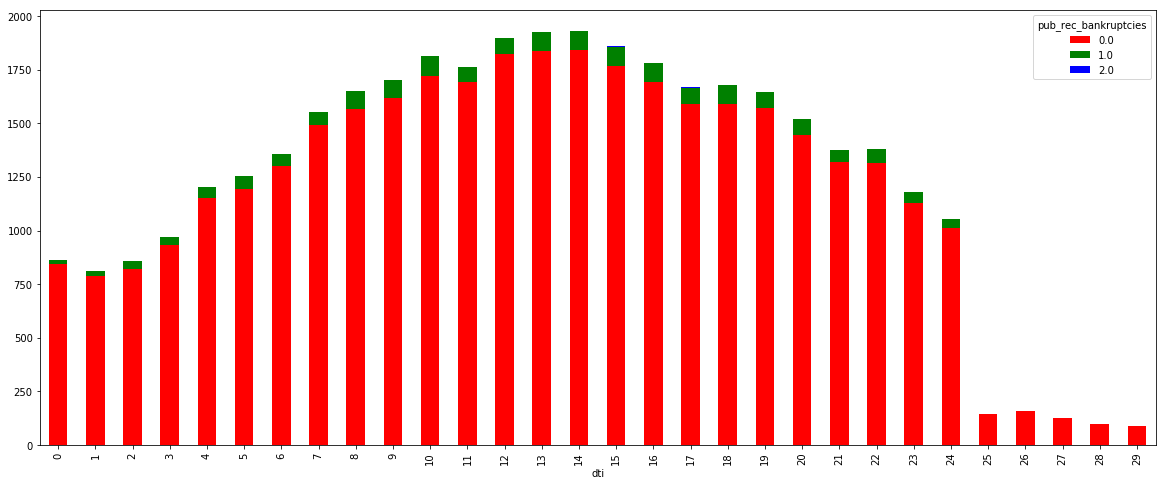

In [88]:
df_prb.groupby(['dti','pub_rec_bankruptcies']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,8),color=("r","g","b"))
plt.show()

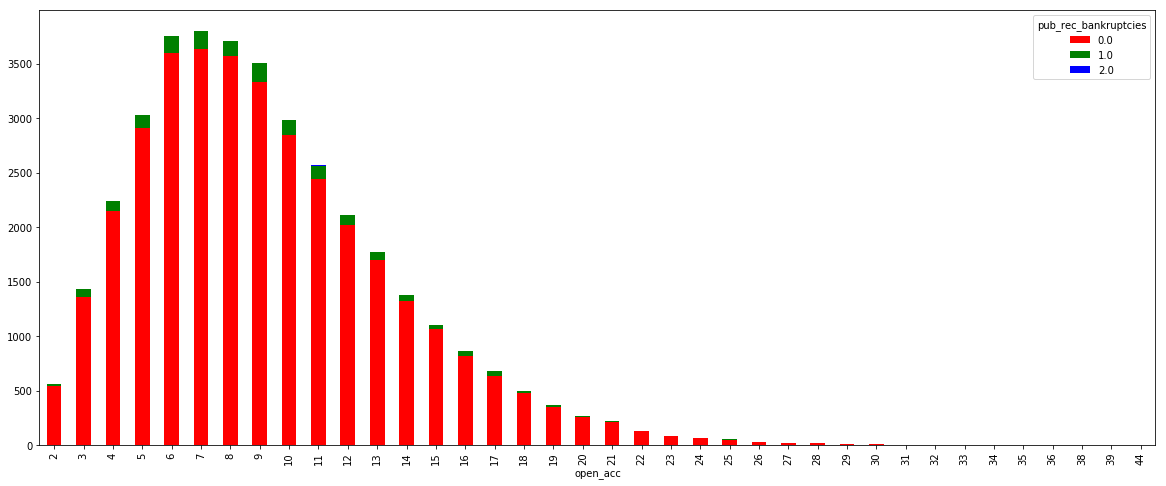

In [89]:
df_prb.groupby(['open_acc','pub_rec_bankruptcies']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,8),color=("r","g","b"))
plt.show()

In [90]:
#Since ~94% of entries correspond to '0' numbers of bankruptcies. Also there isn't any considerable correlation 
#between pub_rec_bankruptcies and 'dti' & 'open_acc'
#'0' bankruptcies are spread out against each of these two parameters

In [91]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].replace(np.nan, 0)
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].astype(int)

In [92]:
df['pub_rec_bankruptcies'].isnull().sum()

0

<font color=green>**5. Extracting Month and year from 'issue_d' column**

In [93]:
#Extracting Month and year from 'issue_d' column
df['issue_m']=df['issue_d'].dt.month_name().str.slice(stop=3)
df['issue_y']=df['issue_d'].dt.year

In [94]:
df[['issue_d','issue_m','issue_y']].head()

,issue_d,issue_m,issue_y
0,2011-12-01,Dec,2011
1,2011-12-01,Dec,2011
2,2011-12-01,Dec,2011
3,2011-12-01,Dec,2011
5,2011-12-01,Dec,2011


In [95]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,last_pymnt_amnt,pub_rec_bankruptcies,int_rate_per,term_mths,revol_util_per,annual_inc_range,emp_years,actual_term_mths,issue_m,issue_y
0,5000,5000,4975.0,162.87,B,B2,unknown,10 or more years,RENT,24000.0,...,171.62,0,10.65,36,83.7,20000-40000,10.0,37,Dec,2011
1,2500,2500,2500.0,59.83,C,C4,Ryder,0 to 1 years,RENT,30000.0,...,119.66,0,15.27,60,9.4,20000-40000,0.0,16,Dec,2011


<font color=green>**5. Chcecking the type of values in 'home_ownerhip' column**

In [96]:
#Checking the type of values in home_ownership
round(100*df.groupby(['home_ownership','loan_status']).loan_status.count()/len(df.index),2)

home_ownership  loan_status
MORTGAGE        Charged Off     6.03
                Fully Paid     37.68
NONE            Fully Paid      0.01
OTHER           Charged Off     0.05
                Fully Paid      0.21
OWN             Charged Off     1.16
                Fully Paid      6.57
RENT            Charged Off     7.42
                Fully Paid     40.89
Name: loan_status, dtype: float64

In [97]:
#Removing the rows representing Home_ownership in Null category as it represents 0.01% of entries whih also are fully paid.
#Hence these entries will not be useful for our analysis and can be dropped.
df=df[df.home_ownership!='NONE']

In [98]:
round(100*df.groupby(['home_ownership','loan_status']).loan_status.count()/len(df.index),2)

home_ownership  loan_status
MORTGAGE        Charged Off     6.03
                Fully Paid     37.68
OTHER           Charged Off     0.05
                Fully Paid      0.21
OWN             Charged Off     1.16
                Fully Paid      6.57
RENT            Charged Off     7.42
                Fully Paid     40.90
Name: loan_status, dtype: float64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38004 entries, 0 to 39716
Data columns (total 40 columns):
loan_amnt                  38004 non-null int64
funded_amnt                38004 non-null int64
funded_amnt_inv            38004 non-null float64
installment                38004 non-null float64
grade                      38004 non-null object
sub_grade                  38004 non-null object
emp_title                  38004 non-null object
emp_length                 38004 non-null object
home_ownership             38004 non-null object
annual_inc                 38004 non-null float64
verification_status        38004 non-null object
issue_d                    38004 non-null datetime64[ns]
loan_status                38004 non-null object
purpose                    38004 non-null object
addr_state                 38004 non-null object
dti                        38004 non-null float64
delinq_2yrs                38004 non-null int64
earliest_cr_line           38004 non-null object


### <font color=black>Creating Derived variables

<font color=darkpink>**1. approved loan % of applied.**

In [100]:
df['percent_approved']=round((100*df['funded_amnt']/df['loan_amnt']),2)
df['percent_approved']=df['percent_approved'].astype(int)

<font color=darkpink>**2.Creating bins of continuous columns-'loan_amnt','funded_amnt' ,'int_rate', 'revol_util','actual_term_mths','dti','open_acc','total acc'**

In [101]:
#revol_util_range
bins=[0,10,20,30,40,50,60,70,80,90,100]
slot=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90 and above']
df['revol_util_range']=pd.cut(df['revol_util_per'],bins,labels=slot)

In [102]:
df['int_rate_per'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate_per, dtype: float64

In [103]:
#int_rate
bins=[5,10,15,20,25]
slot=['5-10','10-15','15-20','20 and above']
df['int_rate_range']=pd.cut(df['int_rate_per'],bins,labels=slot)

In [104]:
#loan amount
bins=[0,5000,10000,15000,20000,25000,30000,35000]
slot=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000 and above']
df['loan_amnt_range']=pd.cut(df['loan_amnt'],bins,labels=slot)

In [105]:
#funded amount
bins=[0,5000,10000,15000,20000,25000,30000,35000]
slot=['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000 and above']
df['funded_amnt_range']=pd.cut(df['funded_amnt'],bins,labels=slot)

In [106]:
#dti
bins=[0,5,10,15,20,25,30]
slot=['0-5','5-10','10-15','15-20','20-25','25 and above']
df['dti_range']=pd.cut(df['dti'],bins,labels=slot)

In [107]:
#actual_term_mths
bins=[0,10,20,30,40,50,60]
slot=['0-10','10-20','20-30','30-40','40-50','50-60']
df['actual_term_mths_range']=pd.cut(df['actual_term_mths'],bins,labels=slot)

In [108]:
#open_acc
bins=[0,10,20,30,42]
slot=['0-10','10-20','20-30','30-42']
df['open_acc_range']=pd.cut(df['open_acc'],bins,labels=slot)

In [109]:
#total_acc
bins=[0,10,20,30,40,50,60,70,80,90]
slot=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80 and above']
df['total_acc_range']=pd.cut(df['total_acc'],bins,labels=slot)

<font color=darkpink>**3. Credit line in years for borrower .**

In [110]:
df['earliest_cr_y']=df['earliest_cr_line'].str.split("-",n=-1,expand=True)[1]

In [111]:
df['earliest_cr_y']=df['earliest_cr_y'].astype(int)

In [112]:
print(df['earliest_cr_y'].dtype)

int32


In [113]:
def f(row):
        if row['earliest_cr_y'] >=46:
            val= str(19)+str(row['earliest_cr_y'])
        else:
            val=str(200)+str(row['earliest_cr_y'])
        return int(val)

In [114]:
df['earliest_cr_year']=df.apply(f,axis=1)

In [115]:
df['earliest_cr_year'].head()

0    1985
1    1999
2    2001
3    1996
5    2004
Name: earliest_cr_year, dtype: int64

In [116]:
df['credit_line_years']=df['issue_y']-df['earliest_cr_year']

In [117]:
df['credit_line_years'].head()

0    26
1    12
2    10
3    15
5     7
Name: credit_line_years, dtype: int64

In [118]:
#credit_line_years
bins=[0,10,20,30,40,50,60,65]
slot=['0-10','10-20','20-30','30-40','40-50','50-60','60-65']
df['credit_line_years_range']=pd.cut(df['credit_line_years'],bins,labels=slot)

In [119]:
df['issue_y']=df['issue_y'].astype(str)

<font color=darkpink>**4.Creating column 'percent_returned' by 'total_amnt'/'funded_amnt'.**

In [120]:
df['percent_returned']=round((100*df['total_pymnt']/df['funded_amnt']),2)
df['percent_returned']=df['percent_returned'].astype(int)

In [121]:
#percent_returned
bins=[0,20,40,60,80,100,120,140,160]
slot=['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160']
df['percent_returned_range']=pd.cut(df['percent_returned'],bins,labels=slot)

<font color=darkpink>**5.Creating column 'emi_per_of_inc' by 'installment'/'monthly income'.**

In [122]:
df['emi_per_of_inc']=round((100*df['installment']/(df['annual_inc']/12)),2)
df['emi_per_of_inc']=df['emi_per_of_inc'].astype(int)

In [123]:
#emi_per_of_inc
bins=[0,5,10,15,20,25,35]
slot=['0-5','5-10','10-15','15-20','20-25','25-35']
df['emi_per_of_inc_range']=pd.cut(df['emi_per_of_inc'],bins,labels=slot)

### <font color=black>Create final dataset for Default analysis by dropping columns which aren't useful

<font color=darkpink>**Dropping- 'funded_amnt_inv','emp_length','earliest_cr_line','revol_bal,'total_pymnt_inv','total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','earliest_cr_y',
'earliest_cr_year'**

In [124]:
df=df.drop(['funded_amnt_inv','emp_length','revol_bal','earliest_cr_line','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','earliest_cr_y', 'earliest_cr_year'],axis=1)

In [125]:
# reason of removing columns above-
#1. columns related to investor amounts can be removed as we need to do default analysis and whether the amount is coming from 
#investor or somewhere else will not make any sense on someone doing default.

#2. emp_length can be removed as new numeric column 'emp_years ' is created.

#3. columns of total returned amounts can be removed except total_pymnt.As how much principal or interest is received
#or how much revovery fee is spent will not make any impact on defaulters.

#4.'earliest_cr_line' can be removed as the information from this column is taken out 

#5. revol_bal: information about revolving credit is captured by revolving utilisaiton %.

<font color=darkpink>**Statistical information of dataset after cleaning.**

In [126]:
df.describe()

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,...,pub_rec_bankruptcies,int_rate_per,term_mths,revol_util_per,emp_years,actual_term_mths,percent_approved,credit_line_years,percent_returned,emi_per_of_inc
count,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,...,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000
mean,10924.769103,10667.738264,318.825689,64581.835673,13.346763,0.145643,0.868014,9.245290,0.055863,21.933112,...,0.043127,11.911429,41.883170,48.607631,4.863646,28.333018,98.590885,13.638354,108.761788,6.129986
std,7238.355523,6985.382477,204.959640,33618.508053,6.660243,0.490814,1.067986,4.388962,0.238649,11.364159,...,0.203792,3.682709,10.324108,28.366513,3.591887,13.566556,7.008337,6.803418,26.655561,4.008490
min,500.000000,500.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,0.000000,5.420000,36.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000
25%,5200.000000,5000.000000,164.910000,40000.000000,8.220000,0.000000,0.000000,6.000000,0.000000,13.000000,...,0.000000,8.940000,36.000000,25.100000,2.000000,18.000000,100.000000,9.000000,108.000000,3.000000
50%,9600.000000,9325.000000,275.810000,58000.000000,13.450000,0.000000,1.000000,9.000000,0.000000,20.000000,...,0.000000,11.710000,36.000000,49.000000,4.000000,31.000000,100.000000,12.000000,114.000000,5.000000
75%,15000.000000,15000.000000,419.825000,80000.000000,18.620000,0.000000,1.000000,12.000000,0.000000,29.000000,...,0.000000,14.350000,36.000000,72.200000,9.000000,37.000000,100.000000,17.000000,121.000000,8.000000
max,35000.000000,35000.000000,1305.190000,200000.000000,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,...,2.000000,24.400000,60.000000,99.900000,10.000000,71.000000,100.000000,65.000000,168.000000,32.000000


### <font color=black>Creating a heat map to understand relationship between continuous variables

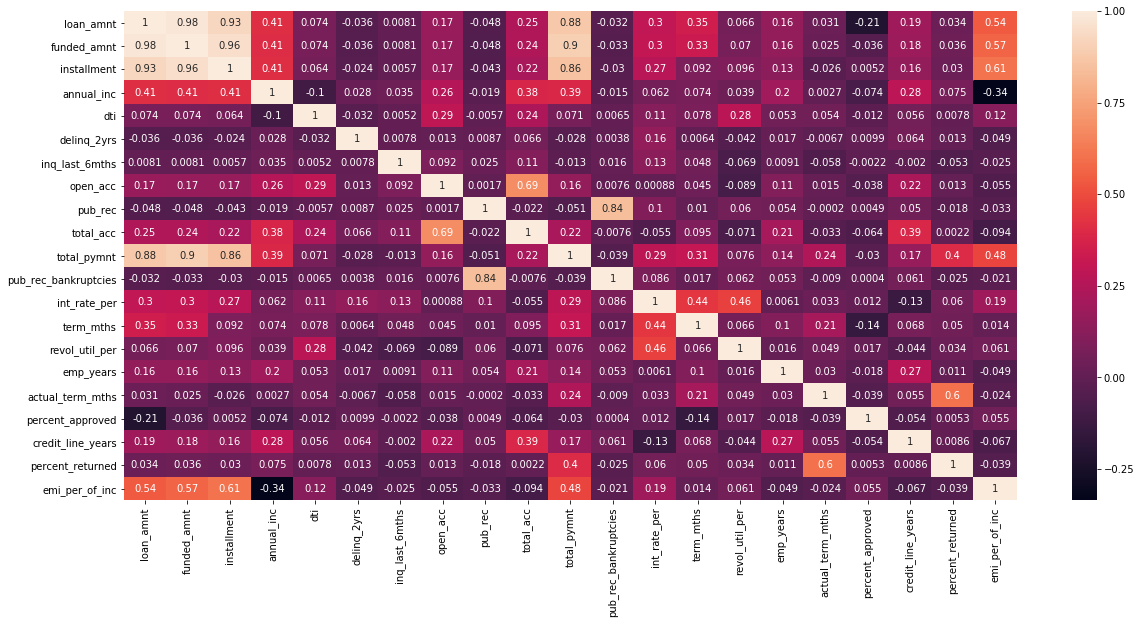

In [127]:
df_corr=df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(df_corr, 
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values,annot= True)
plt.show()

In [128]:
#Inference: Loan_amnt, funded_amnt and installment are very strongly correlated. Hence only loan_amnt can be analysed.
#open_ac and toal_acc are correlated strongly hence only the former can analysed.

### <font color=black>Univariate analysis- To understand distribution and metrics of important variables

In [129]:
#Create sgments of data for Charged Off loans as df_coff and for Fully Paid loans as df_fp
df_coff=df.loc[df['loan_status']=='Charged Off',:]
df_fp=df.loc[df['loan_status']=='Fully Paid',:]

In [130]:
round(100*df.groupby(['loan_status']).loan_status.count()/len(df.index),2)

loan_status
Charged Off    14.65
Fully Paid     85.35
Name: loan_status, dtype: float64

In [131]:
df.shape

(38004, 44)

<font color=darkpink>**Distribution plots for significant variables for analysis.**

In [132]:
#creating function
def univariate(df,col):
    sns.set(style="whitegrid")
    plt.figure(figsize=(20,8))

    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
                
    ax[0].set_title("Distribution Plot",fontsize=15)
    ax[0].xaxis.set_tick_params(labelsize=15,rotation=30)
    ax[0].set_xlabel(col,fontsize=15)
    ax[0].yaxis.set_tick_params(labelsize=15)
    sns.distplot(df[col],ax=ax[0],color='crimson')
  
    ax[1].set_title("Box Plot",fontsize=15)
    sns.boxplot(data =df, x=col,ax=ax[1],orient='v',color='lightseagreen')
    ax[1].set_ylabel(col,fontsize=15)
    ax[1].xaxis.set_tick_params(labelsize=15)
    ax[1].yaxis.set_tick_params(labelsize=15)
    plt.show()

In [133]:
df.describe()

,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,...,pub_rec_bankruptcies,int_rate_per,term_mths,revol_util_per,emp_years,actual_term_mths,percent_approved,credit_line_years,percent_returned,emi_per_of_inc
count,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,...,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000,38004.000000
mean,10924.769103,10667.738264,318.825689,64581.835673,13.346763,0.145643,0.868014,9.245290,0.055863,21.933112,...,0.043127,11.911429,41.883170,48.607631,4.863646,28.333018,98.590885,13.638354,108.761788,6.129986
std,7238.355523,6985.382477,204.959640,33618.508053,6.660243,0.490814,1.067986,4.388962,0.238649,11.364159,...,0.203792,3.682709,10.324108,28.366513,3.591887,13.566556,7.008337,6.803418,26.655561,4.008490
min,500.000000,500.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,0.000000,5.420000,36.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000
25%,5200.000000,5000.000000,164.910000,40000.000000,8.220000,0.000000,0.000000,6.000000,0.000000,13.000000,...,0.000000,8.940000,36.000000,25.100000,2.000000,18.000000,100.000000,9.000000,108.000000,3.000000
50%,9600.000000,9325.000000,275.810000,58000.000000,13.450000,0.000000,1.000000,9.000000,0.000000,20.000000,...,0.000000,11.710000,36.000000,49.000000,4.000000,31.000000,100.000000,12.000000,114.000000,5.000000
75%,15000.000000,15000.000000,419.825000,80000.000000,18.620000,0.000000,1.000000,12.000000,0.000000,29.000000,...,0.000000,14.350000,36.000000,72.200000,9.000000,37.000000,100.000000,17.000000,121.000000,8.000000
max,35000.000000,35000.000000,1305.190000,200000.000000,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,...,2.000000,24.400000,60.000000,99.900000,10.000000,71.000000,100.000000,65.000000,168.000000,32.000000


<Figure size 1440x576 with 0 Axes>

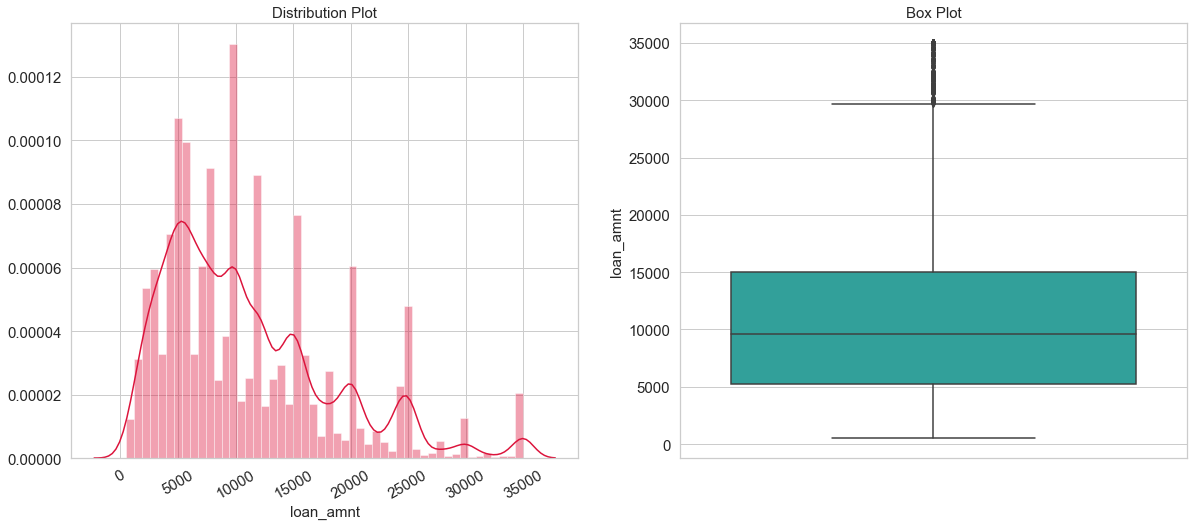

In [134]:
#01. 'loan_amnt'
univariate(df=df,col='loan_amnt')

In [135]:
round(100*len(df.loc[df['loan_amnt']>30000])/len(df.index),2)

1.72

In [136]:
#Inference: 50% of loan_amnt data is concentrated in 5000-15000 range. 1.7% data is outlier and lies above 30000.

<Figure size 1440x576 with 0 Axes>

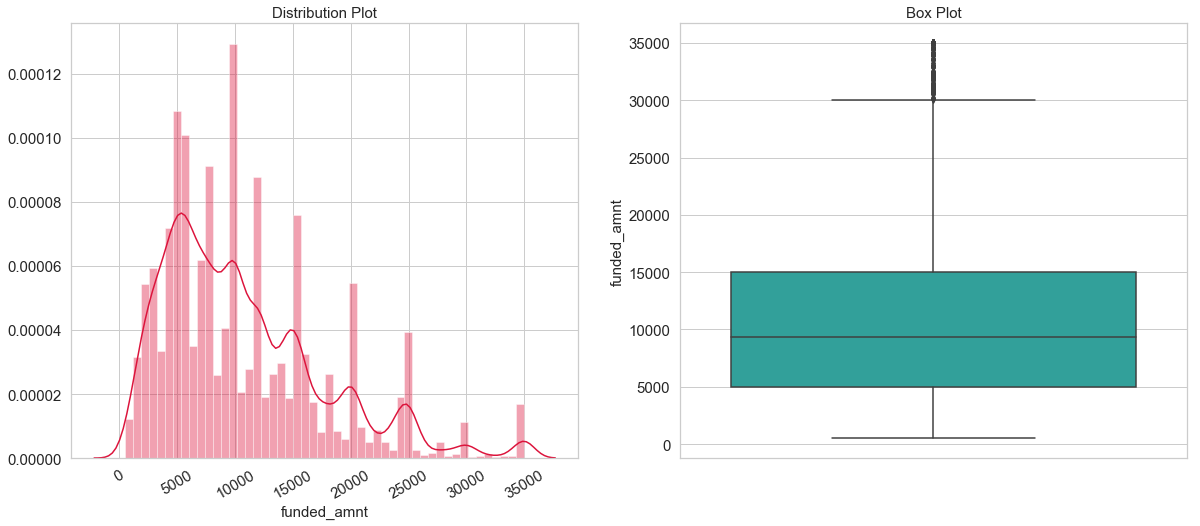

In [137]:
univariate(df=df,col='funded_amnt')

In [138]:
round(100*len(df.loc[df['funded_amnt']>30000])/len(df.index),2)

1.44

In [139]:
#Inference: Like 'loan_amnt', for funded amount also 50% data is in 5000-15000 ramge. 1.5% data is outlier and lies above 30,000.

<Figure size 1440x576 with 0 Axes>

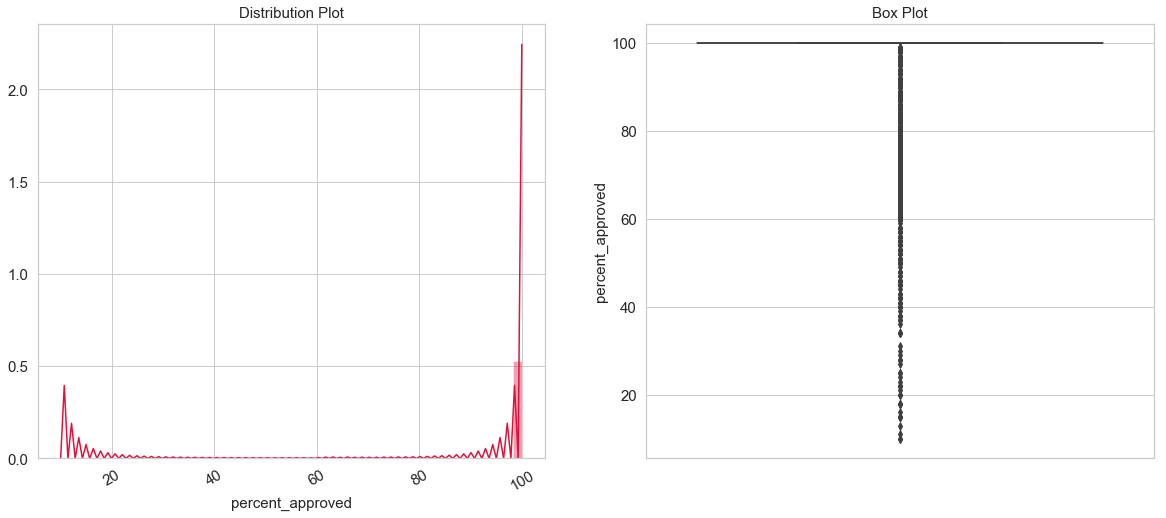

In [140]:
univariate(df=df,col='percent_approved')

In [141]:
round(100*len(df.loc[df['percent_approved']<100])/len(df.index),2)

4.51

In [142]:
round(100*len(df.loc[(df['percent_approved']<100) & (df['loan_status']=="Charged Off")])/len(df.index),2)

0.83

In [143]:
round(100*len(df.loc[(df['percent_approved']<100) & (df['loan_status']=="Fully Paid")])/len(df.index),2)

3.68

In [144]:
#Inference: For 4.5% of loans the amount is less than what was applied. Only 0.83% cases were there which defaulted.
#3.68% loans which were given lesser than applied amount, fully paid them back.

<Figure size 1440x576 with 0 Axes>

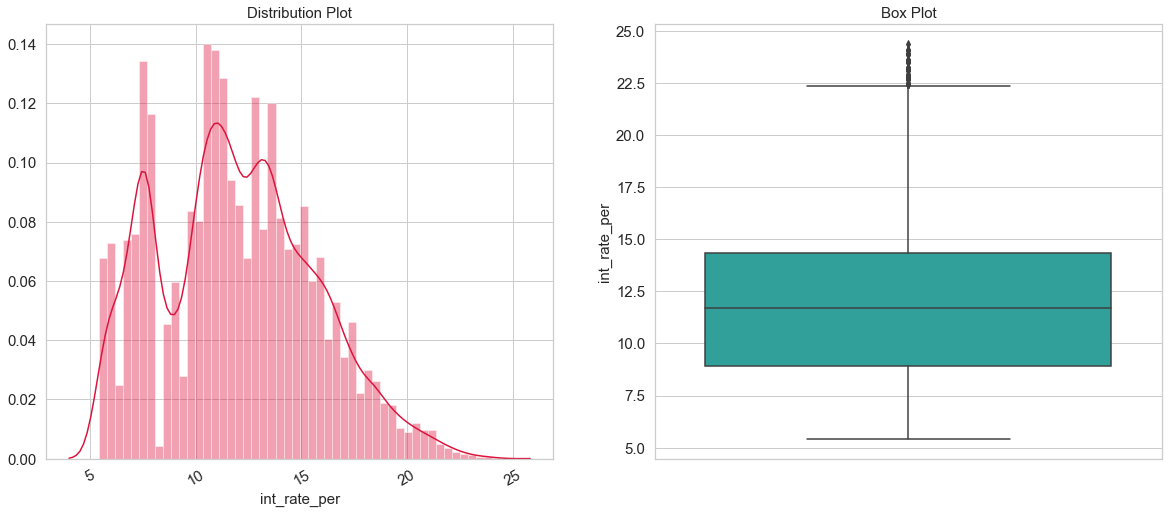

In [145]:
univariate(df=df,col='int_rate_per')

In [146]:
round(100*len(df.loc[df['int_rate_per']>22.5])/len(df.index),2)

0.17

In [147]:
#Inference: 50% of data lies in 8.75% to 13.75% interest rate range. 0.17% data is outlier.

<Figure size 1440x576 with 0 Axes>

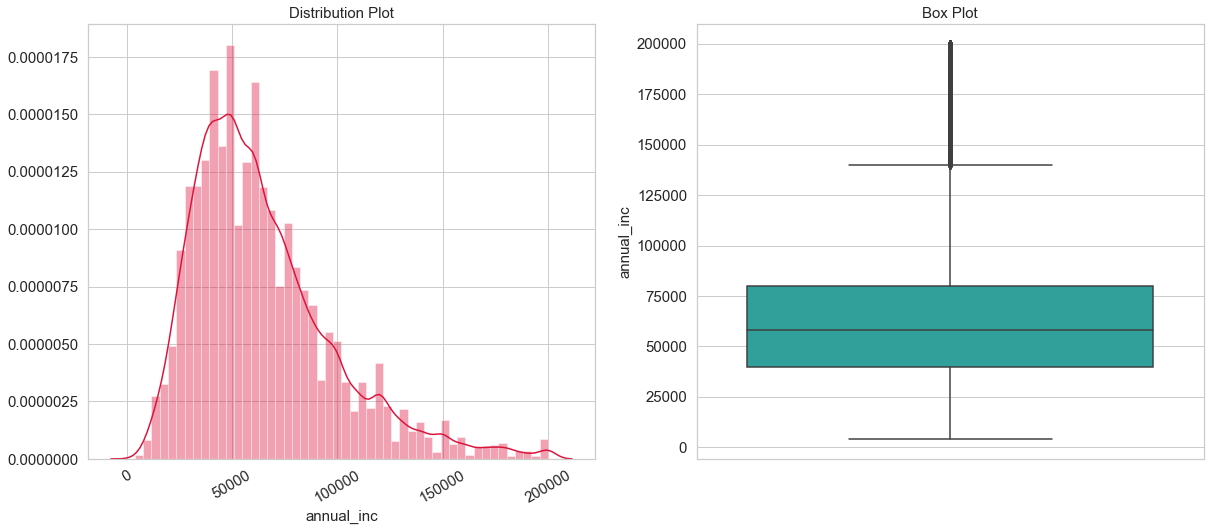

In [148]:
univariate(df=df,col='annual_inc')

In [149]:
#Inference: 50% data is distributed between 40,000 and 80,000. Outliers above 200,000 annual_inc have already been removed 
#to avoid skewed analysis.

<Figure size 1440x576 with 0 Axes>

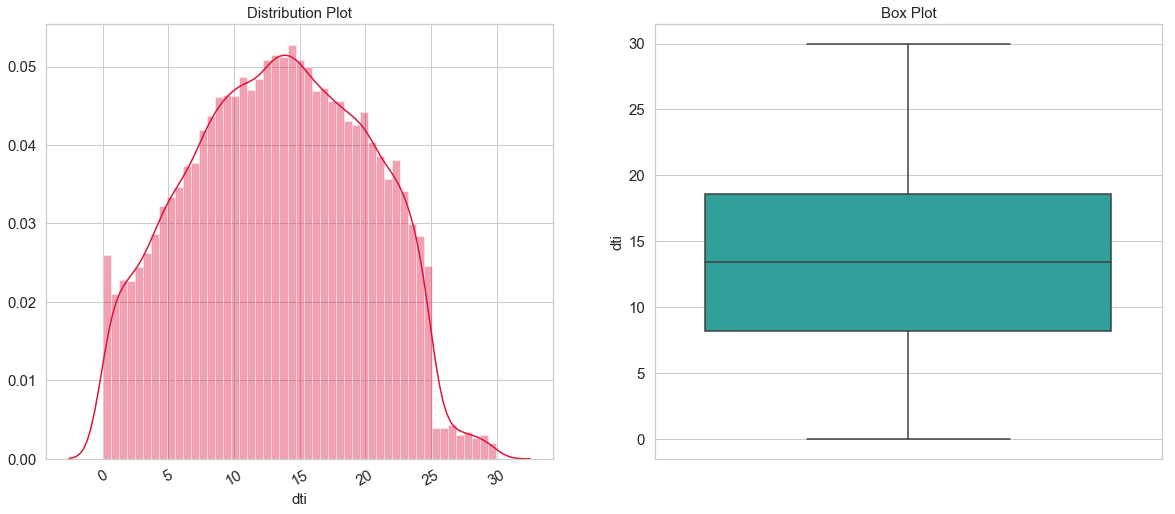

In [150]:
univariate(df=df,col='dti')

<Figure size 1440x576 with 0 Axes>

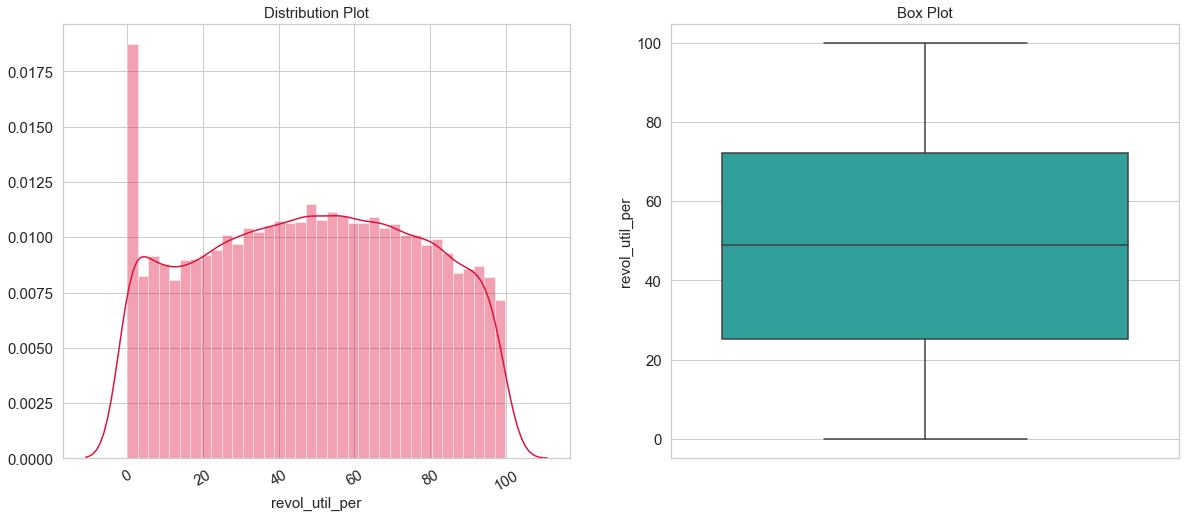

In [151]:
univariate(df=df,col='revol_util_per')

In [152]:
#50% of revolving utilisation % is concentrated in 25% to 75% range.

<Figure size 1440x576 with 0 Axes>

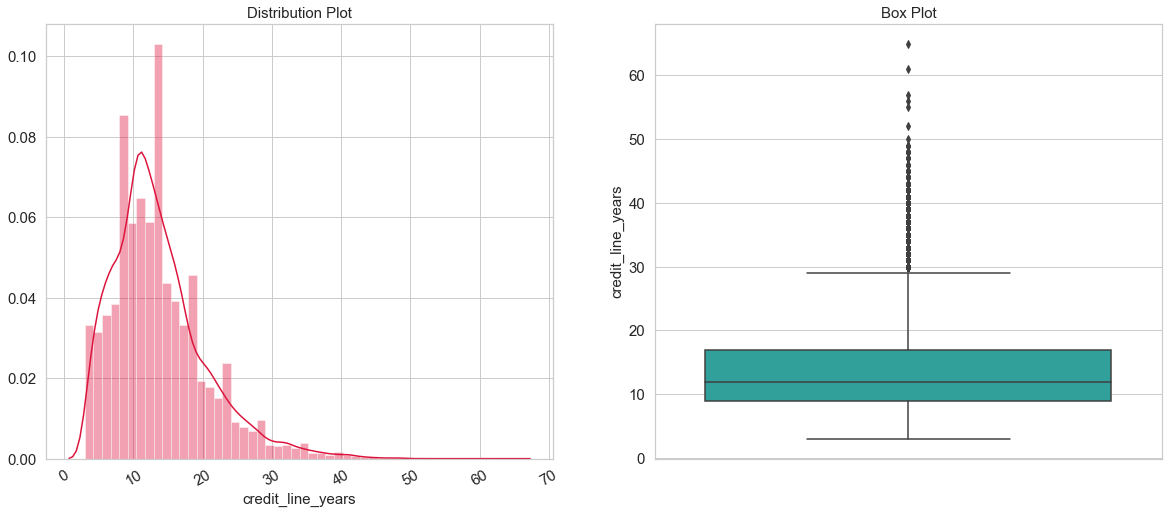

In [153]:
univariate(df=df,col='credit_line_years')

In [154]:
#50% of loans have credit history of 9 to 17 years.

In [155]:
df['credit_line_years'].describe()

count    38004.000000
mean        13.638354
std          6.803418
min          3.000000
25%          9.000000
50%         12.000000
75%         17.000000
max         65.000000
Name: credit_line_years, dtype: float64

### <font color=black>Segmented Univariate & Bivariate analysis

In [156]:
#pub_rec and loan_status
round(100*df.groupby(['pub_rec','loan_status']).loan_status.count()/len(df.index),2)

pub_rec  loan_status
0        Charged Off    13.43
         Fully Paid     81.16
1        Charged Off     1.19
         Fully Paid      4.07
2        Charged Off     0.03
         Fully Paid      0.10
3        Fully Paid      0.02
4        Fully Paid      0.01
Name: loan_status, dtype: float64

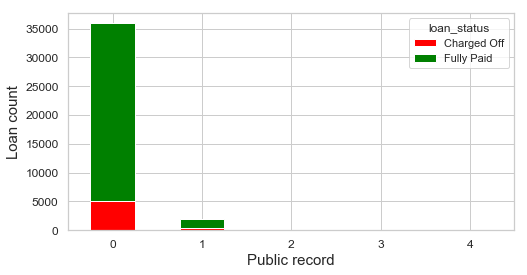

In [157]:
df.groupby(['pub_rec','loan_status']).size().unstack().plot(kind='bar',stacked=True,figsize=(8,4),color=('red','green'))
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Public record",fontsize=15)
plt.ylabel("Loan count",fontsize=15)
plt.show()

In [158]:
#~86% loans are fully paid as per pub_rec. and 81% have 0 pub_rec. Charged off loans have 13.4% against 0 pub_rec. 
#Hence we can't obtain much insights from this column.

In [159]:
#delinq_2yrs
round(100*df.groupby(['delinq_2yrs','loan_status']).loan_status.count()/len(df.index),2)

delinq_2yrs  loan_status
0            Charged Off    12.85
             Fully Paid     76.36
1            Charged Off     1.32
             Fully Paid      6.96
2            Charged Off     0.34
             Fully Paid      1.38
3            Charged Off     0.09
             Fully Paid      0.45
4            Charged Off     0.03
             Fully Paid      0.12
5            Charged Off     0.01
             Fully Paid      0.05
6            Charged Off     0.00
             Fully Paid      0.02
7            Charged Off     0.00
             Fully Paid      0.01
8            Charged Off     0.00
             Fully Paid      0.00
9            Fully Paid      0.00
11           Fully Paid      0.00
Name: loan_status, dtype: float64

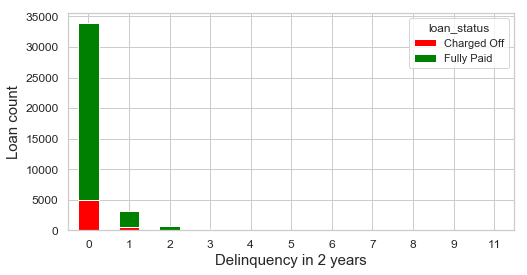

In [160]:
df.groupby(['delinq_2yrs','loan_status']).size().unstack().plot(kind='bar',stacked=True,figsize=(8,4),color=('red','green'))
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Delinquency in 2 years",fontsize=15)
plt.ylabel("Loan count",fontsize=15)
plt.show()

In [161]:
#Maximum charged off loans are against 0 delinq_2yrs. Hence it isn't a useful predictor of default.

In [162]:
#inq_last_6mths
round(100*df.groupby(['inq_last_6mths','loan_status']).loan_status.count()/len(df.index),2)

inq_last_6mths  loan_status
0               Charged Off     5.94
                Fully Paid     42.66
1               Charged Off     4.36
                Fully Paid     23.28
2               Charged Off     2.47
                Fully Paid     12.16
3               Charged Off     1.60
                Fully Paid      6.07
4               Charged Off     0.13
                Fully Paid      0.67
5               Charged Off     0.07
                Fully Paid      0.30
6               Charged Off     0.04
                Fully Paid      0.12
7               Charged Off     0.03
                Fully Paid      0.06
8               Charged Off     0.01
                Fully Paid      0.02
Name: loan_status, dtype: float64

<Figure size 432x288 with 0 Axes>

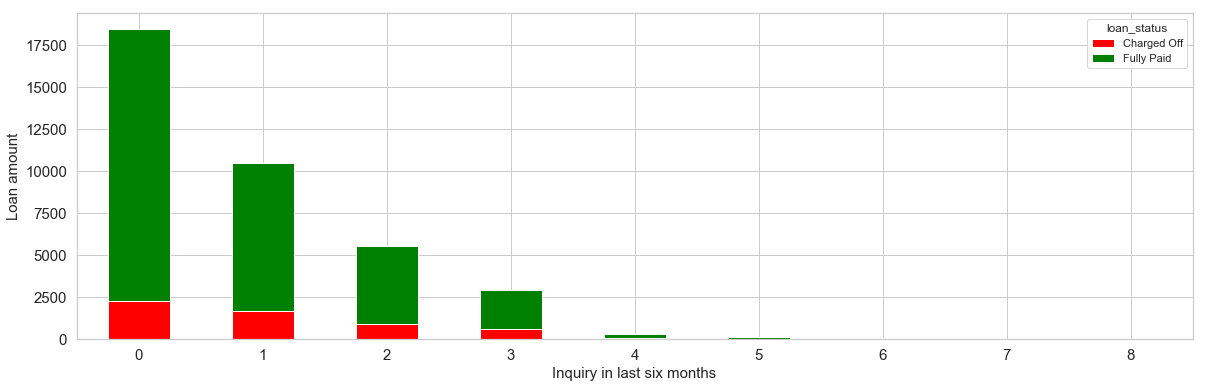

In [163]:
plt.figure()
ax=df.groupby(['inq_last_6mths','loan_status']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,6),color=('red','green'))
plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Inquiry in last six months",fontsize=15)
plt.ylabel("Loan amount",fontsize=15)
plt.show()

In [164]:
#Even with 0 inquiries in last 6 months people have defaulted. But an eye should be kept at
#loan applicants with 1,2 and 3 inquiries in last 6 months.

In [165]:
#pub_rec_bankruptcies
round(100*df.groupby(['pub_rec_bankruptcies','loan_status']).loan_status.count()/len(df.index),2)

pub_rec_bankruptcies  loan_status
0                     Charged Off    13.69
                      Fully Paid     82.02
1                     Charged Off     0.96
                      Fully Paid      3.33
2                     Charged Off     0.01
                      Fully Paid      0.01
Name: loan_status, dtype: float64

In [166]:
#pub_rec_bankruptcies isn't a very useful metric. Since most charged off are by applicants with 0 pub_rec_bankruptcies.

In [167]:
round(100*df.groupby(['term_mths','loan_status']).loan_status.count()/len(df.index),2)

term_mths  loan_status
36         Charged Off     8.40
           Fully Paid     67.09
60         Charged Off     6.25
           Fully Paid     18.26
Name: loan_status, dtype: float64

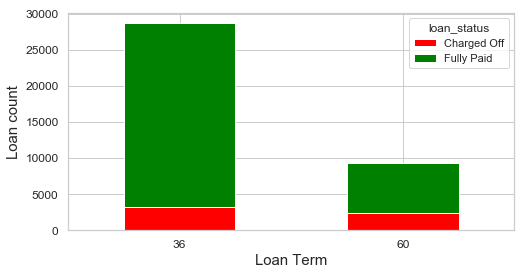

In [168]:
df.groupby(['term_mths','loan_status']).size().unstack().plot(kind='bar',stacked=True,figsize=(8,4),color=('red','green'))
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Loan Term",fontsize=15)
plt.ylabel("Loan count",fontsize=15)
plt.show()

In [169]:
#~75% of loan issued are for 36 months. Defaulted loans are very close for both categores 8.4% and 6.25%.

In [170]:
#emp_title
round(100*df_coff.groupby('emp_title').emp_title.count().sort_values(ascending=False)/len(df_coff.index),2).head()

emp_title
unknown            8.55
Bank of America    0.36
US Army            0.32
Walmart            0.25
UPS                0.22
Name: emp_title, dtype: float64

In [171]:
#Out of all the defaulted loans, ~9% are for emp_title corresponding to unknown. i.e. from people whose whereabouts of job aren't known.
#Hence loan issue decision should be carefully made about such people.

<font color=olivedrab>**UDF-bivariate() for Bivariate analysis: To find percent of total in each category.**

In [172]:
def bivariate(df,col,hue =None):
        temp = pd.Series(data = hue)        
        fig, ax = plt.subplots(figsize=(16,6))
        sns.countplot(data = df, x= col,order=df[col].value_counts().index, hue = hue,palette="Set2")
        ax.legend(loc='upper right',shadow='True',fontsize=12) 
        plt.xticks(rotation=30,fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel(col,fontsize=18)
        plt.ylabel('count',fontsize=18)
        plt.tight_layout()
        for p in ax.patches:
                if float(p.get_height()) > 0:
                    height = p.get_height()
                    ax.annotate('{:1.2f}%'.format((height*100)/float(len(df))), (p.get_x()+0.05, height+100),weight='bold',fontsize=12)  
                else:
                    height = .00000001
                    ax.annotate('{:1.2f}%'.format((height*100)/float(len(df))), (p.get_x()+0.05, height+20),weight='bold',fontsize=12)  
        del temp
plt.show()


In [173]:
#the bivariate() function will plot Segmented univariate and bivariate analysis both.
#As it will represent count across segments and analyse loan status and one other variable at the same time.

<font color=olivedrab>**UDF-seg_univariate() for segmented default % analysis: Percent of Charged off and Fully paid loans out of total of a partiular category.**

In [174]:
def seg_univariate(col):
    df_col=df.groupby([col,'loan_status']).loan_status.count().unstack()
    df_col_per=round(100*df_col.div(df_col.sum(axis=1),axis=0),2)
    ax=df_col_per.plot(kind="bar", stacked=True,color=('salmon','lightseagreen'),figsize=(16,6))
    ax.legend(loc='upper right',shadow='True',fontsize=12) 
    plt.xticks(rotation=30,fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col,fontsize=16)
    plt.ylabel('percent',fontsize=16)
    for p in ax.patches:
        width,height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:1.2f}%'.format(height), (p.get_x()+.1*width, p.get_y()+.3*height),fontsize=12)    
plt.show()

In [175]:
#The seg_univariate() function will represent loan status-Charged Off/Fully paid as % of one particular category.
#For eg. % of loans charged off out of total loans in Grade A only.

<font color=purple>**Impact of Loan Term on default.**

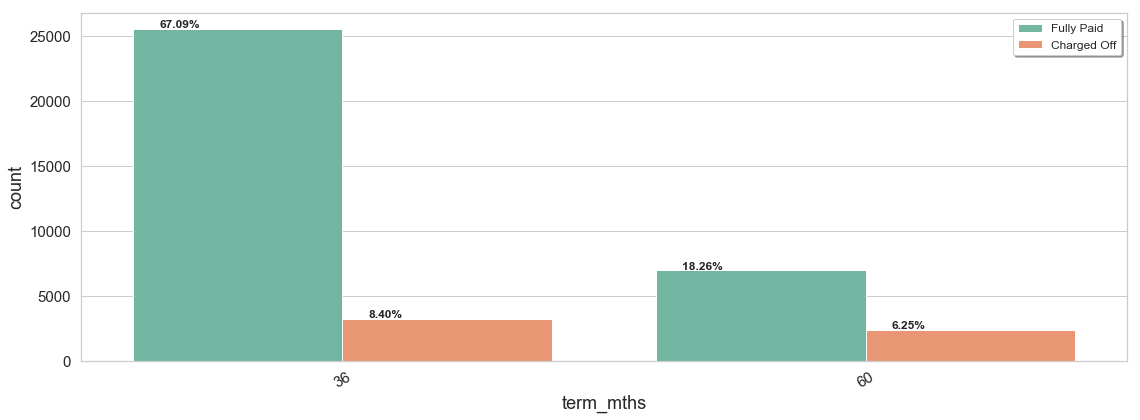

In [176]:
bivariate(df,col='term_mths',hue='loan_status')

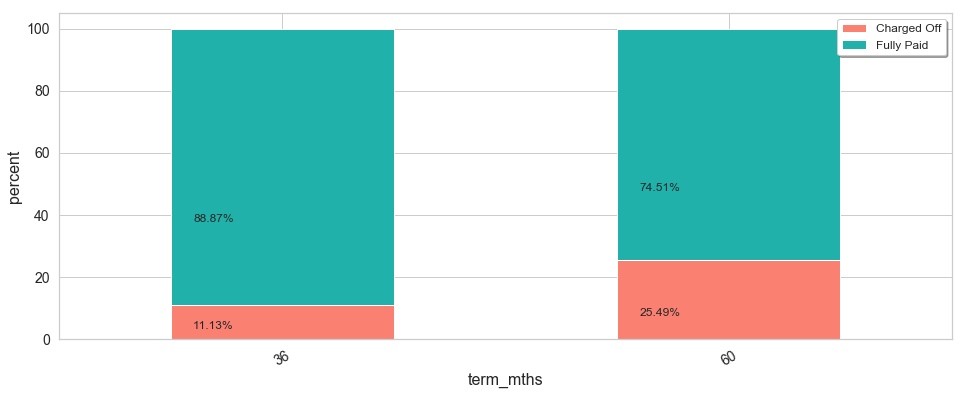

In [177]:
seg_univariate(col='term_mths')

<font color=purple>**Impact of Loan Grade on default.**

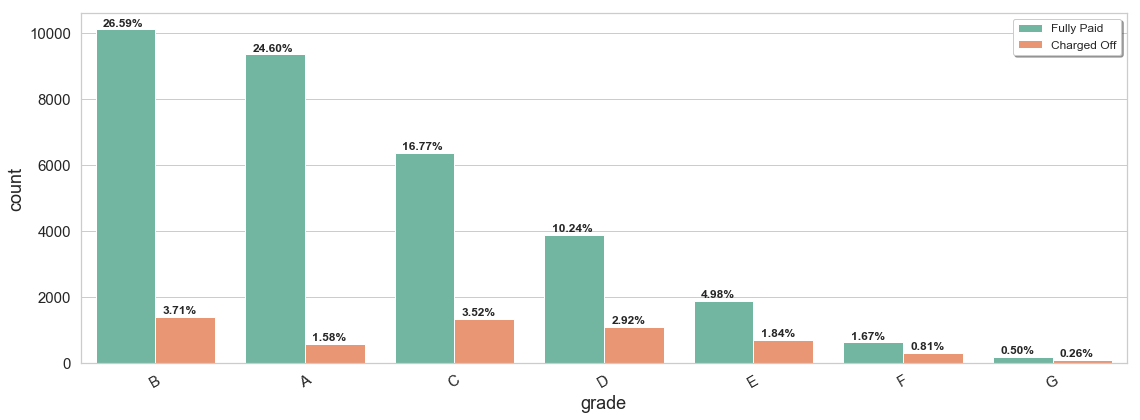

In [178]:
bivariate(df,col='grade',hue='loan_status')

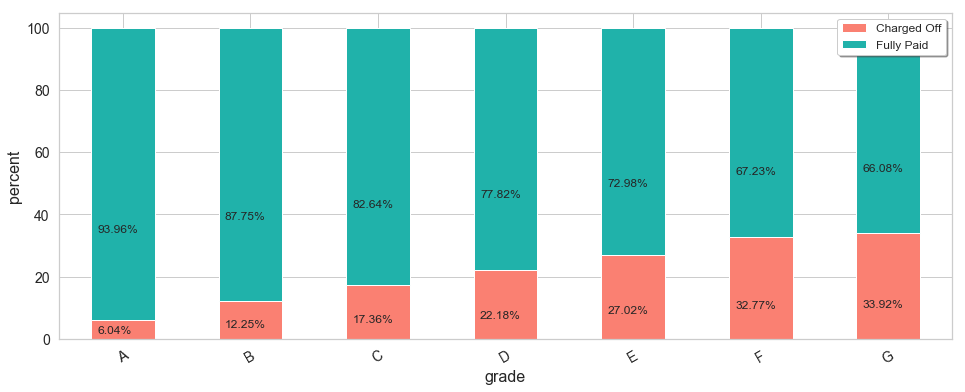

In [179]:
seg_univariate(col='grade')

In [180]:
#Inference: 30% (Maximum) loans are issued in B grade followed by 26% in A. 
#Though the % of loans in G and F is just 0.8% and 2.5%.
#However of the total loans issued in any particular grade, default is maximum in G grade at 34%.
# Default severity order: G>F>E>D>C>B>A

<font color=purple>**Impact of Loan Purpose on default.**

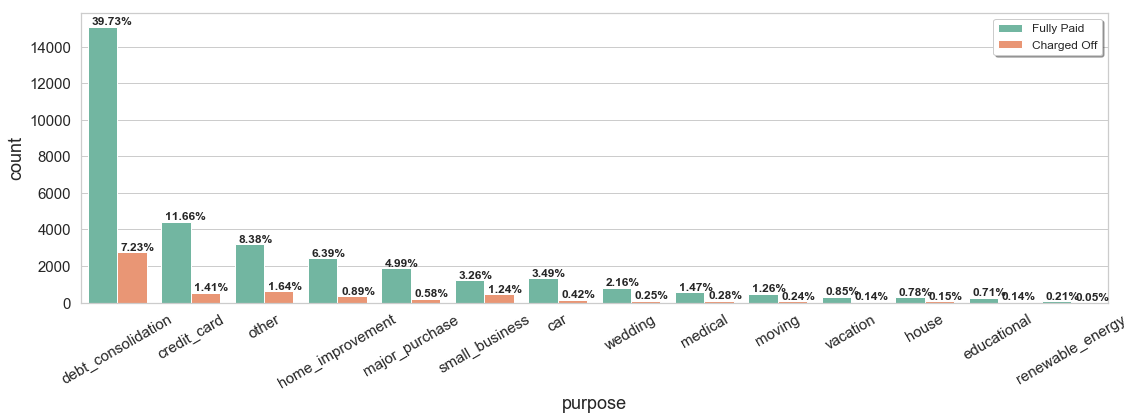

In [181]:
bivariate(df,col='purpose',hue='loan_status')

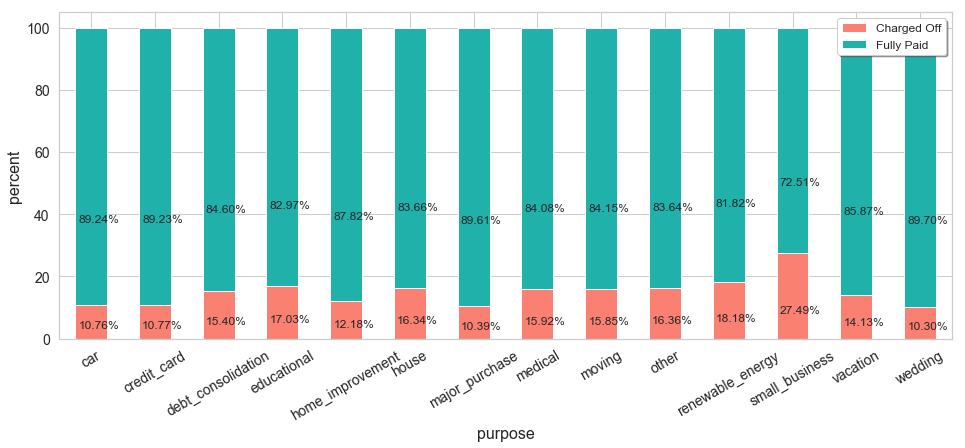

In [182]:
seg_univariate(col='purpose')

In [183]:
#Maximum loans are issued for 'debt_consolidation' purpose. i.e. the borrower wants to strengthen his crdit position on other loans
#debt_consolidation has 48.5% of toal loans with default rates of 15.4%.
#Maximum default is observed by 'small_business' loans at 27.5% though such loans represent only ~5% of total.
#High default rates are in- small_business,otherdebt_consolidaiton, medical etc.


<font color=purple>**Impact of Home ownership on default.**

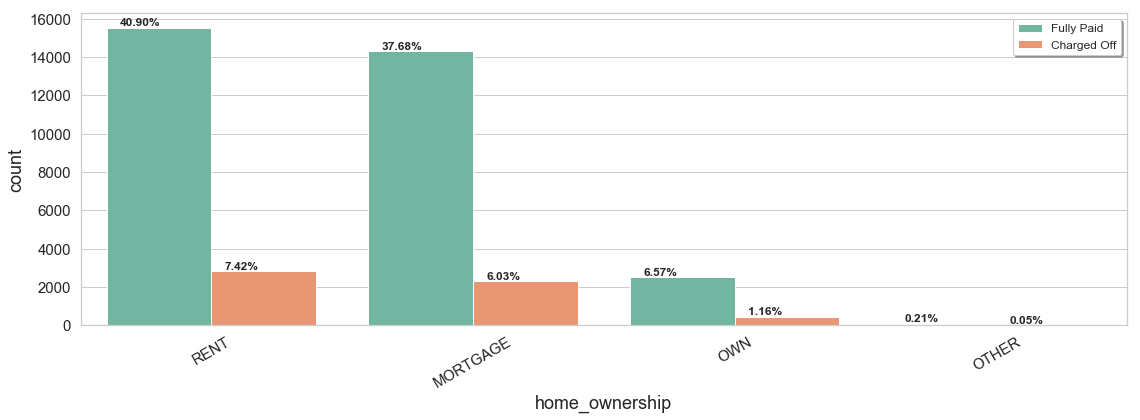

In [184]:
bivariate(df,col='home_ownership',hue='loan_status')

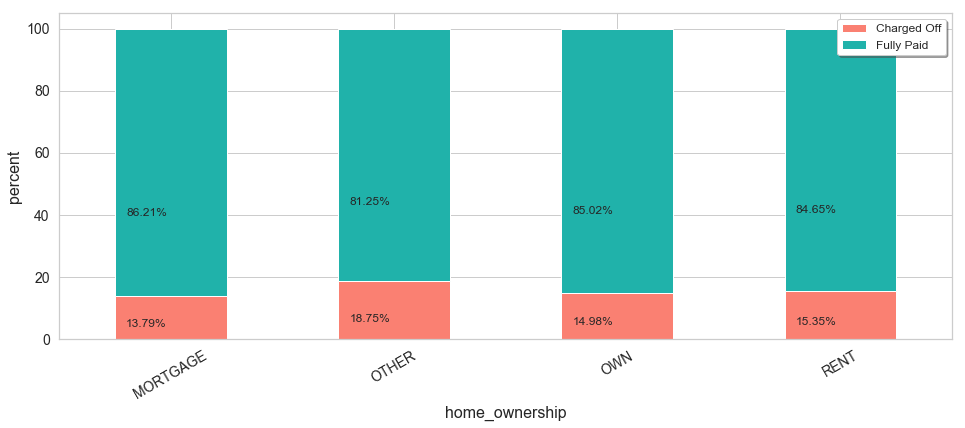

In [185]:
seg_univariate(col='home_ownership')

In [186]:
#Close to half of all loans issued are to home_owenership status of Rent (48.5%) followed by Mortgage at 43.7%.
#Maximum default rate (18.75%) is observed for home_ownership category Other but that data is just 0.2% of total.
#Rent/Mortgage and Own home_ownership has close to 15% default rates.
#Home_ownership status of 'Other' should be carefully examined before giving loans.

<font color=purple>**Impact of Loan interest rate on default.**

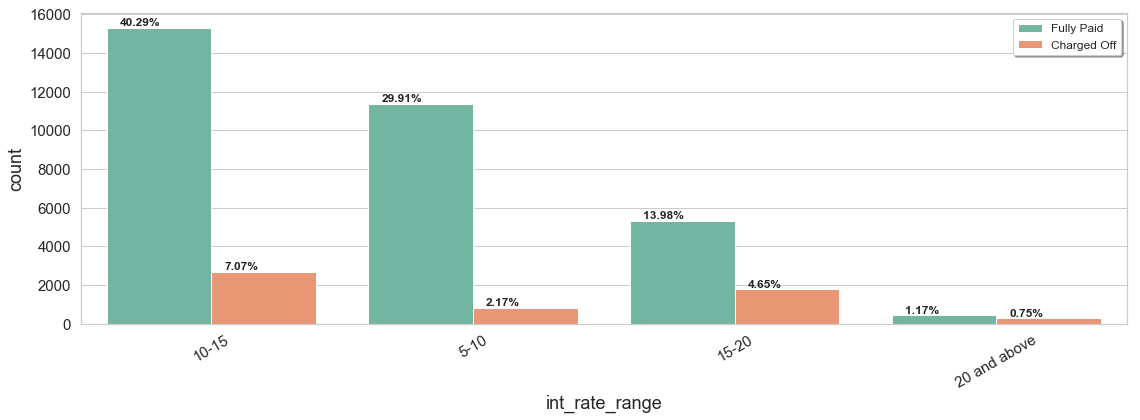

In [187]:
bivariate(df,col='int_rate_range',hue='loan_status')

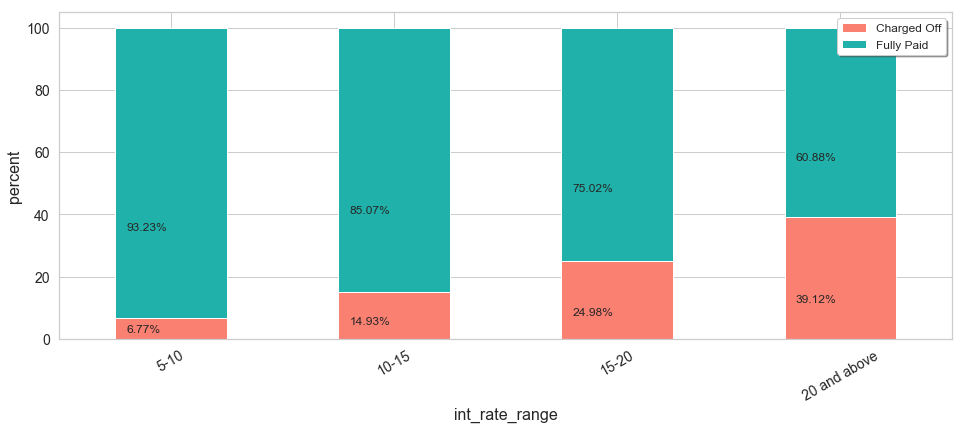

In [188]:
seg_univariate(col='int_rate_range')

In [189]:
#47.3% loans i.e.close to half loans are issued in 10-15% interest rate.
#Maximum default rate (40%) is observed in higher interest rate loans.
#These high interest rate loans make up 2% of total number.
#As interest rate of loan increases, default rates also increase.
#High interest rate loans have very high probability of default. 

<font color=purple>**Impact of Loan amount on default.**

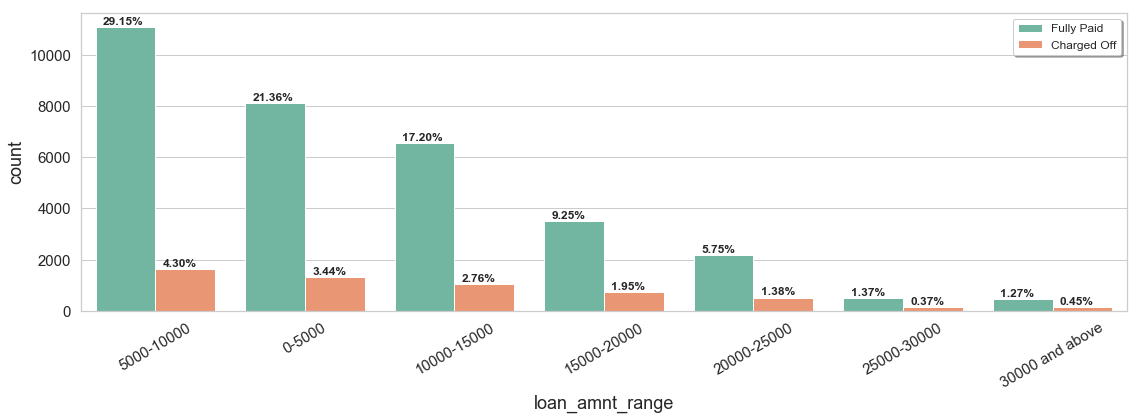

In [190]:
bivariate(df,col='loan_amnt_range',hue='loan_status')

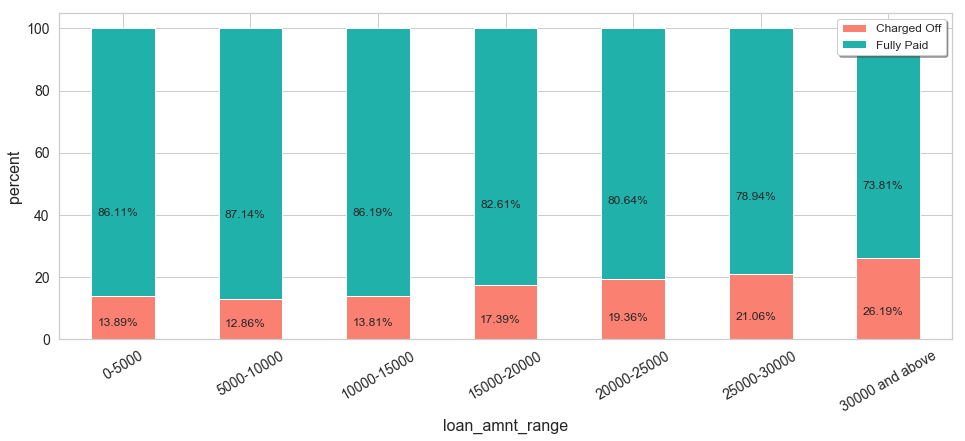

In [191]:
seg_univariate(col='loan_amnt_range')

In [192]:
#34% loans are in 5000-10000 range with default rates of 13.89%.
#maximum default rates are observed in high amount loans i,e, 30000 and above.
#26% default is observed in these high value loans.
#However they represent just 1.8% of total loans.

<font color=purple>**Impact of annual income on default.**

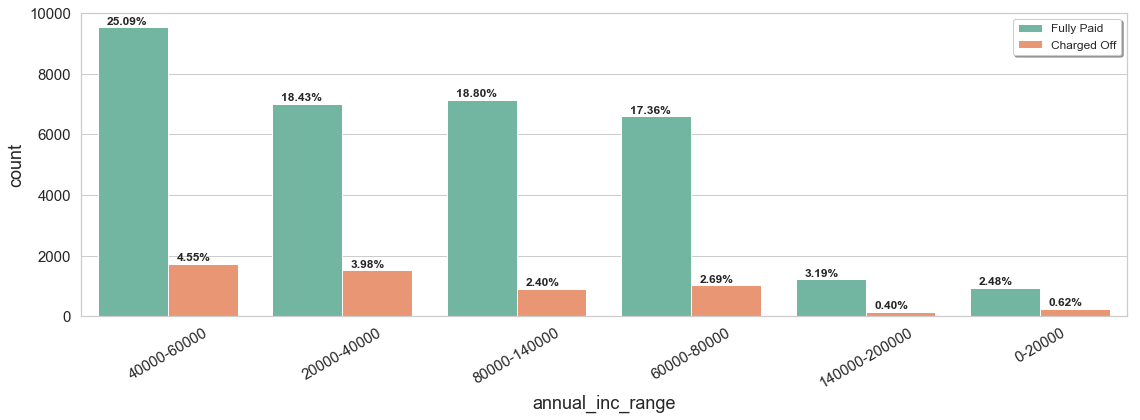

In [193]:
bivariate(df,col='annual_inc_range',hue='loan_status')

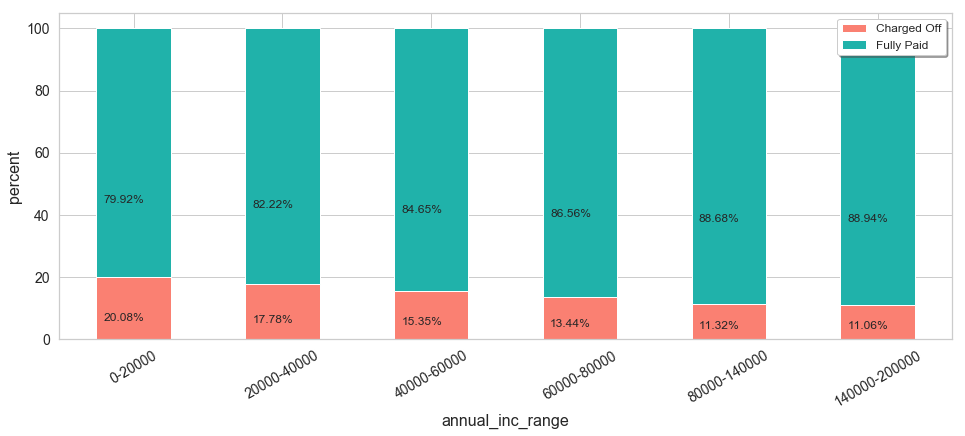

In [194]:
seg_univariate(col='annual_inc_range')

In [195]:
#Maximum loans are issued in 40,000-60,000 annual income category.
#Least number (3% of total) of loans are given to lowest income group of 0-20000.
#Default rates decrease with Rising annual income. People from lower income groups are more likely to default.
#Hence annual income is a strong indicator of default.

<font color=purple>**Impact of Loan verification status on default.**

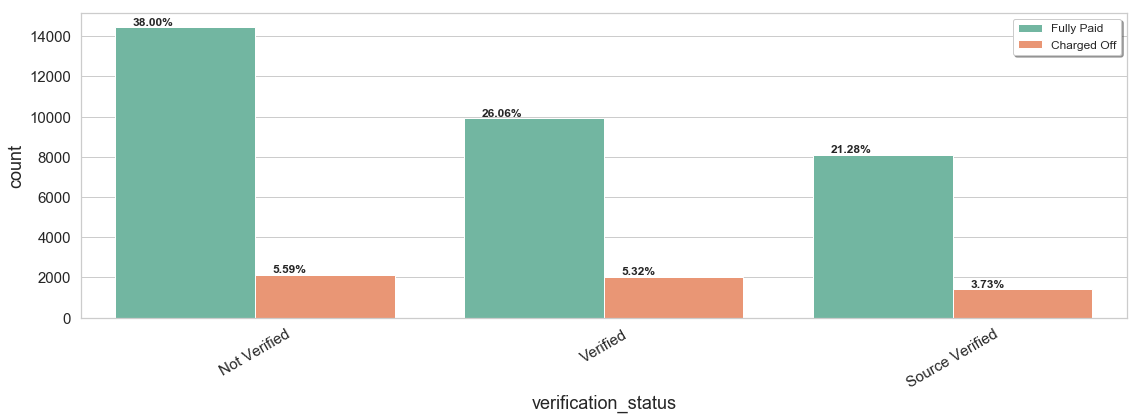

In [196]:
bivariate(df,col='verification_status',hue='loan_status')

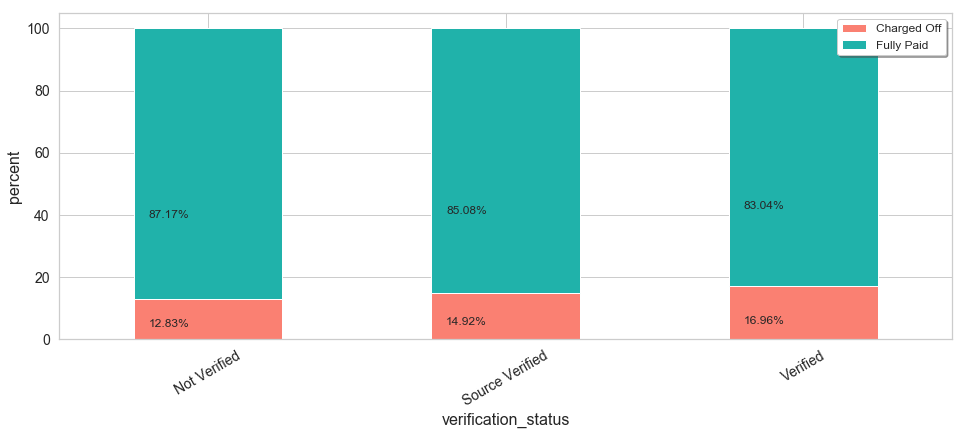

In [197]:
seg_univariate(col='verification_status')

In [198]:
#38.6% of all issued loans were not verified and 31.3% were verified.
#Surprisingly, Maximum default (17%) is observed in verified loans.Lower rates of default observed in Not verified loans at 12.69%.
#There isn't huge difference of default rates among different verification status.
#However, the company should review its Verification procedure.

<font color=purple>**Impact of Debt to income ratio on default.**

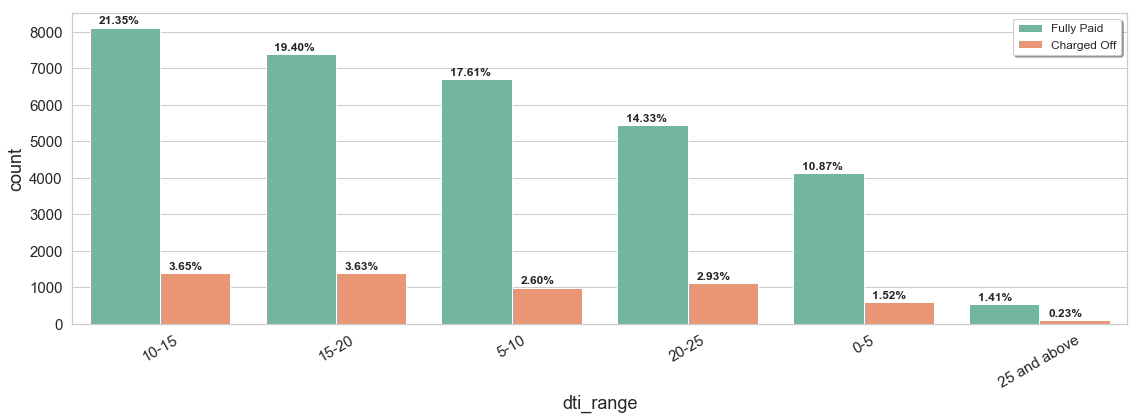

In [199]:
bivariate(df,col='dti_range',hue='loan_status')

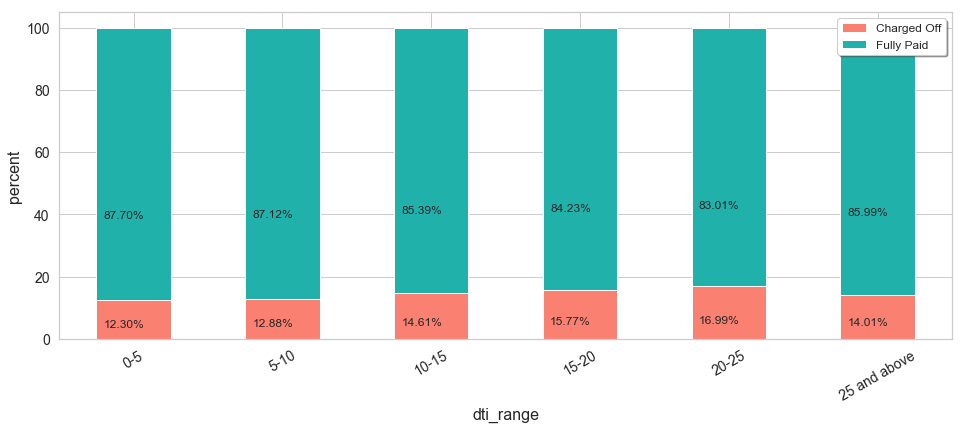

In [200]:
seg_univariate(col='dti_range')

In [201]:
#Maximum number of loans (25% of total) are issued in DTI range of 10-15.
#Least number of loans (1.64% of total) are issued to high DTI bearing borrowers.
#As the dti increases,default rates increase.Its clearly displayed in above graph.
#DTI is a strong indicator of default.

<font color=purple>**Impact of borrower's open credit lines on default.**

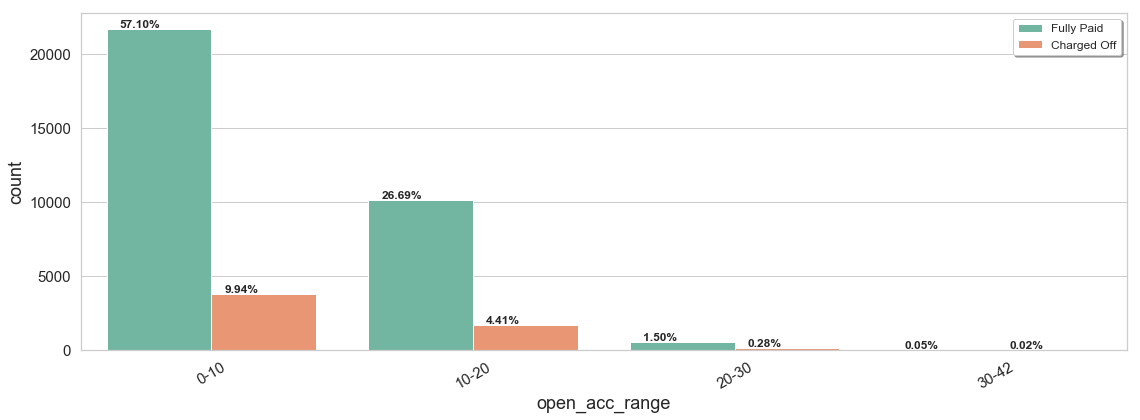

In [202]:
bivariate(df,col='open_acc_range',hue='loan_status')

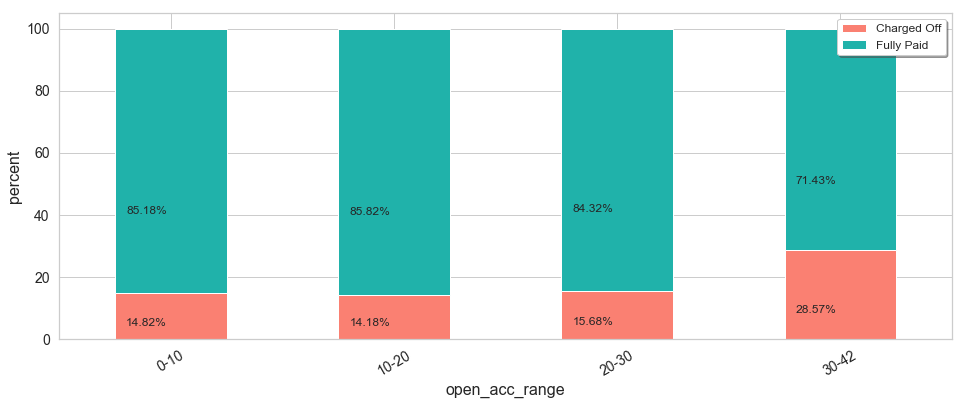

In [203]:
seg_univariate(col='open_acc_range')

In [204]:
#As the open credit lines of borrower increase, default rates increase as displayed in above graph.
#67% loans are given in open_acc in 0-10 still 15% defaults are observed.
#High default rate of 28.6% is observed in open_acc range of 30-42 though such loans constitute just 0.07% of total number of loans.
#Open_acc i.e. active credit lines of a borrower is a strong indicator of default.

<font color=purple>**Impact of actual term on default.**

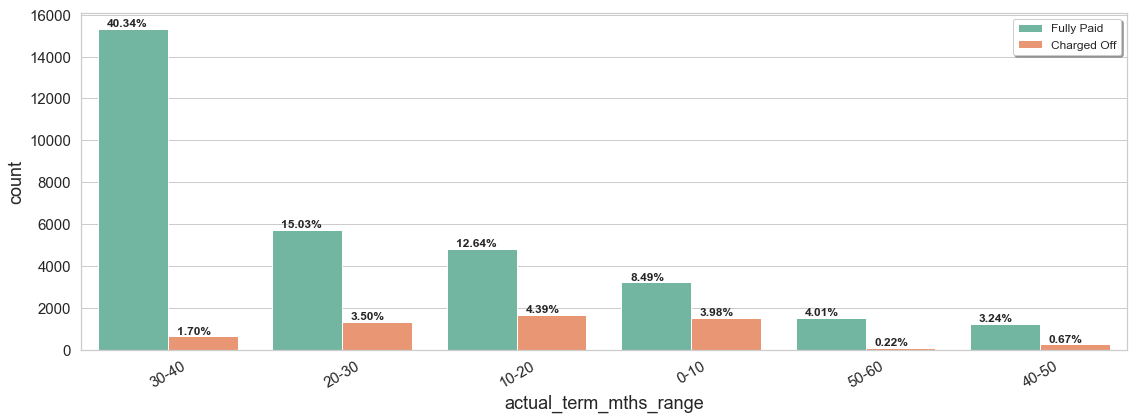

In [205]:
bivariate(df,col='actual_term_mths_range',hue='loan_status')

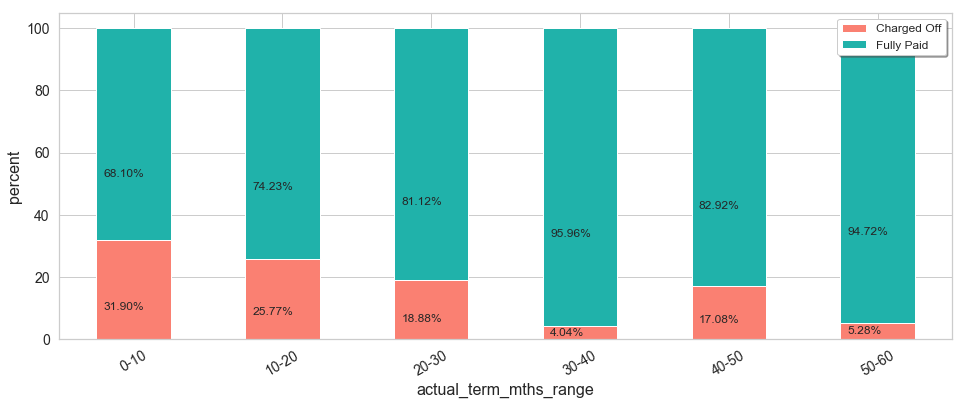

In [206]:
seg_univariate(col='actual_term_mths_range')

In [207]:
#Above graph dosplayes the actual_term until which the borrower paid the emis.
#For 42%, actual term lasted for 42 months.
#Default rate is highest at 32% in 0-10 month range indicating defaulters are inclined to pull back of their instalments very early.
#Looking at the past record of payments, loan decision should be made.

<font color=purple>**Impact of employment years on default.**

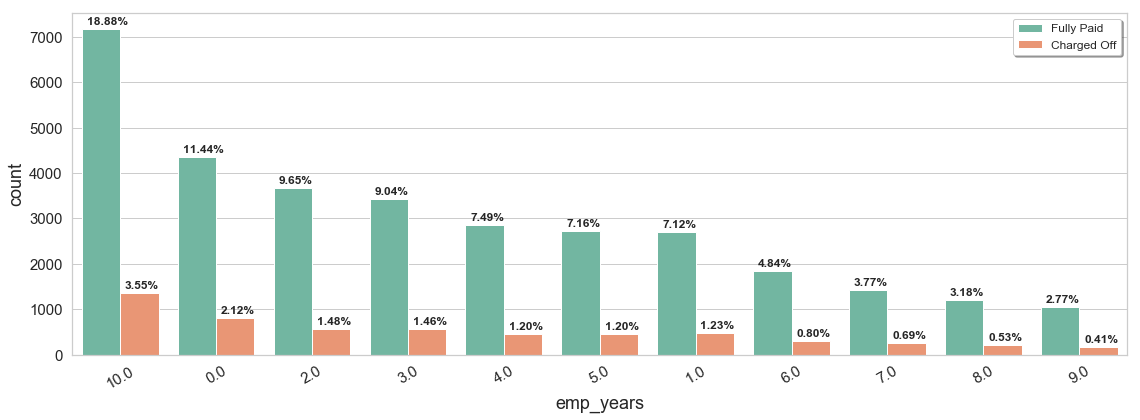

In [208]:
bivariate(df,col='emp_years',hue='loan_status')

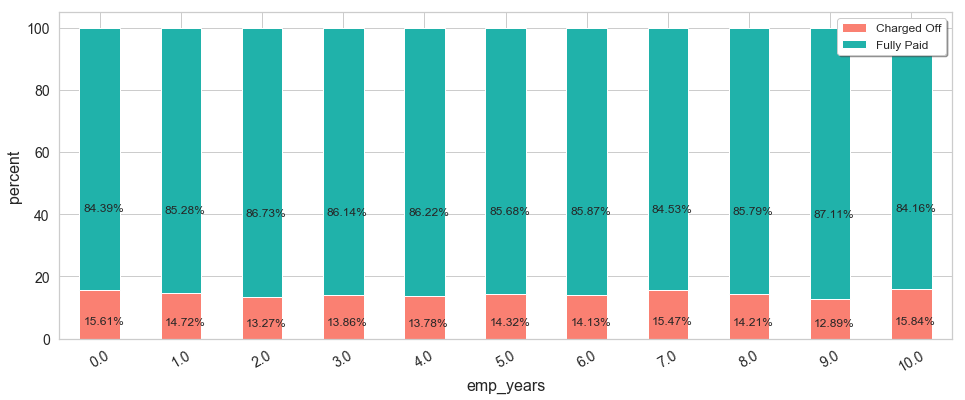

In [209]:
seg_univariate(col='emp_years')

In [210]:
#It is quite surprising that employment years aren't making any significant effect on default patterns.
#Maximum loans (22.5% of total) are granted to people with 10 or more years of experience, 
#followed by 13.5% to people with 0-1 years of experience.

<font color=purple>**Impact of Credit history years on default.**

In [211]:
 #Credit_line_years represntes the number of years since the borrower's earliest credit

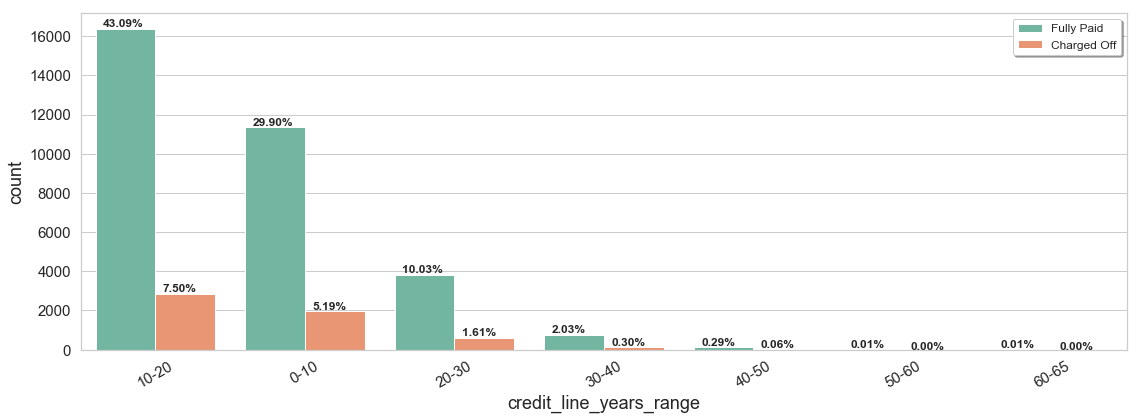

In [212]:
bivariate(df,col='credit_line_years_range',hue='loan_status')

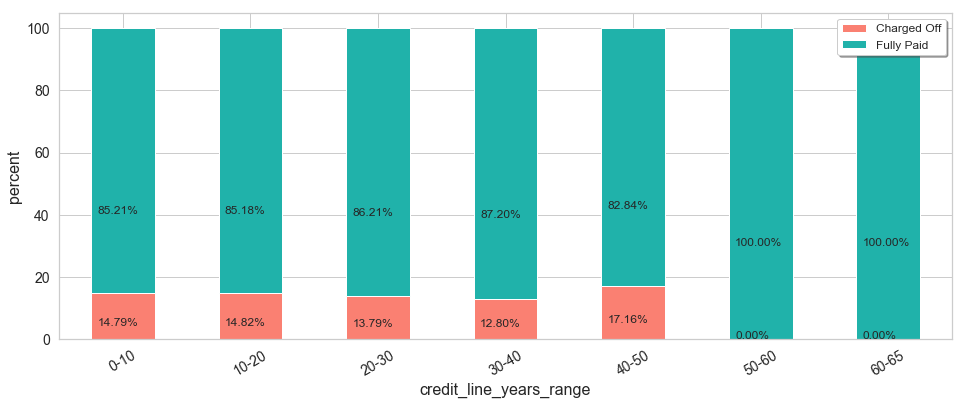

In [213]:
seg_univariate(col='credit_line_years_range')

In [214]:
#Above analysis displays impact of Credit association history of borrower. However it doesn't make much impact that when did 
#a borrower start to take the loans.
#Default % are higher for 40-50 year old history bearing borrowers but such loans are just 0.35% of total.

<font color=purple>**Impact of loan issue year on default.**

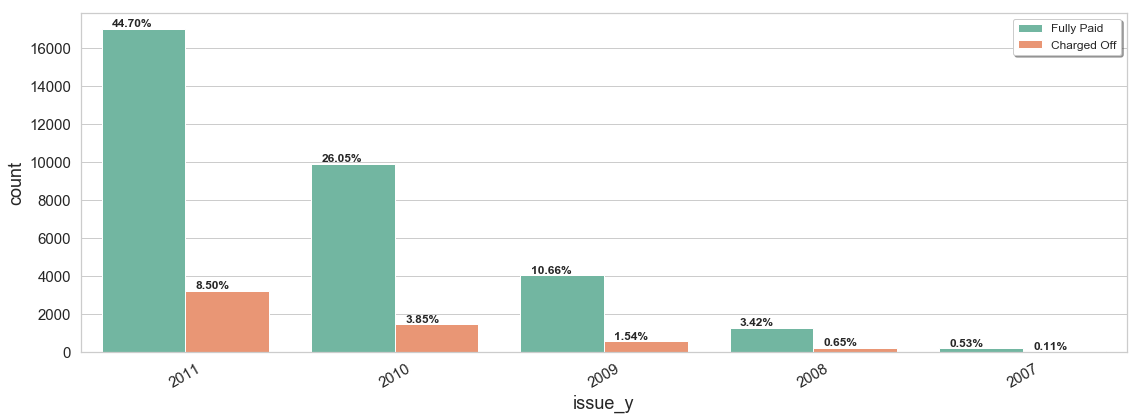

In [215]:
bivariate(df,col='issue_y',hue='loan_status')

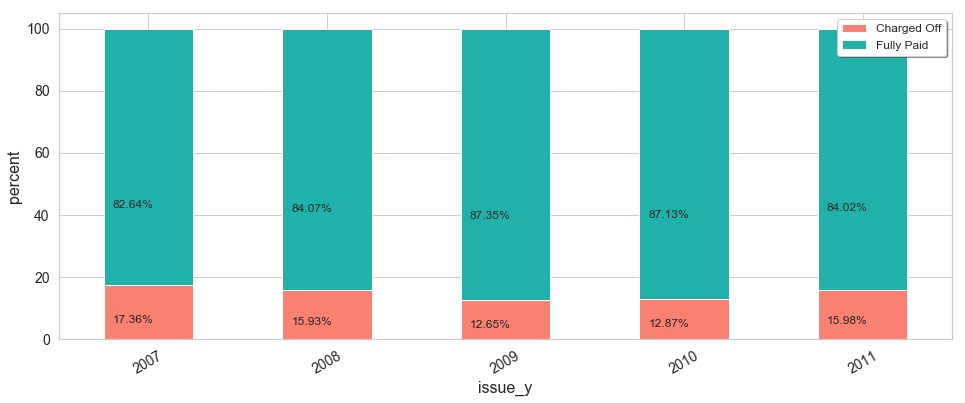

In [216]:
seg_univariate(col='issue_y')

In [217]:
#No specific default pattern observed depending on issue year of loan.

<font color=purple>**Impact of revolving utilisation ratio on default.**

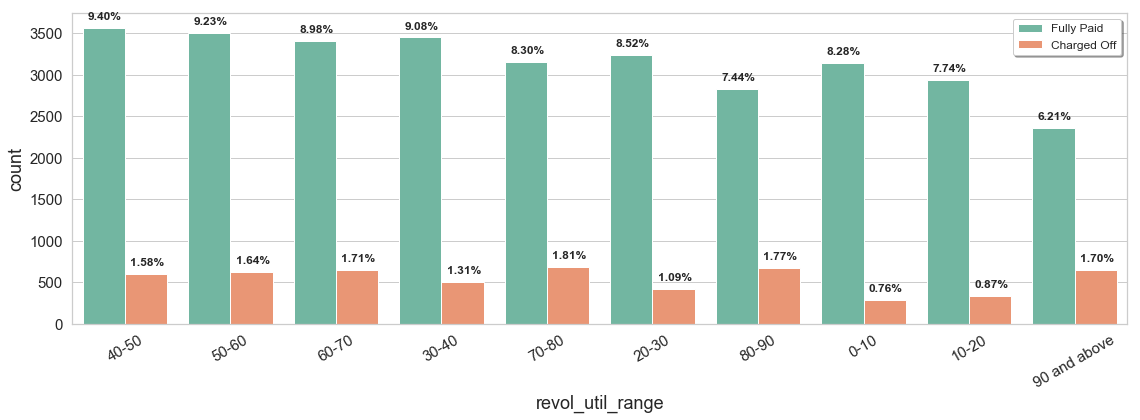

In [218]:
bivariate(df,col='revol_util_range',hue='loan_status')

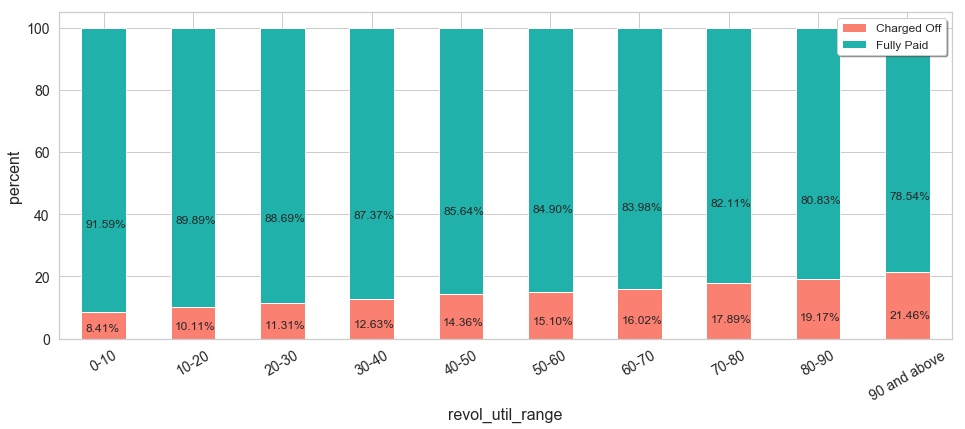

In [219]:
seg_univariate(col='revol_util_range')

In [220]:
#As the revolving utilisation ratio is increasing, default percentage is increasing.
#at the ratios of more than 30, loans should be granted thoughtfully looking at other factors.

<font color=purple>**Impact of (EMI/monthly income) ratio on default.**

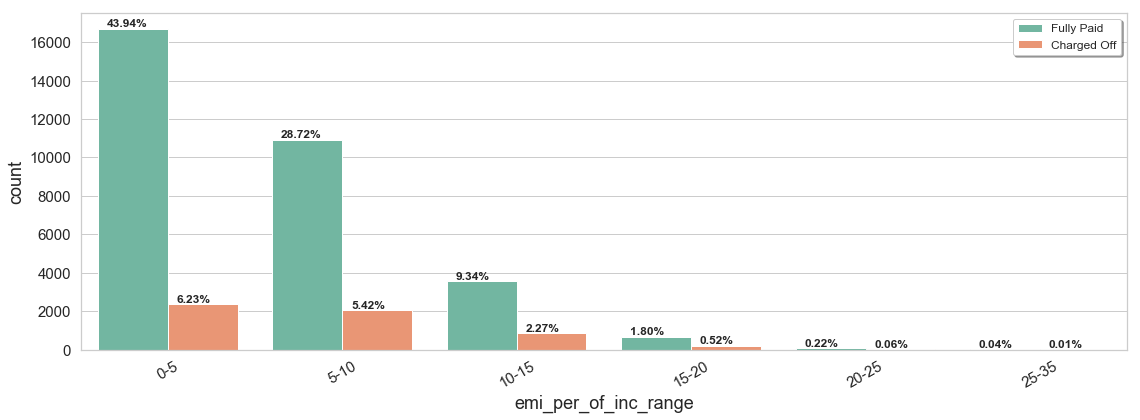

In [221]:
bivariate(df,col='emi_per_of_inc_range',hue='loan_status')

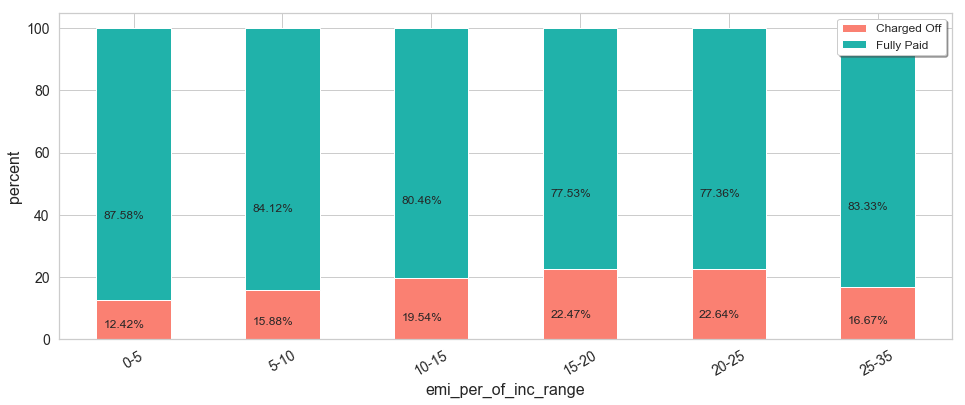

In [222]:
seg_univariate(col='emi_per_of_inc_range')

In [223]:
#As the monthly installment [(EMI)/monthly_income] is increasing, default % is increasing.
#50% loans are granted in 0-5 ratio and this has least default rate at 12.3%.
#This is justified because the borrower must be capable of paying the installment out of his monthly salary.
#Hence this ratio should be as low as possible.

<font color=purple>**Impact of % Loan amount returned on default.**

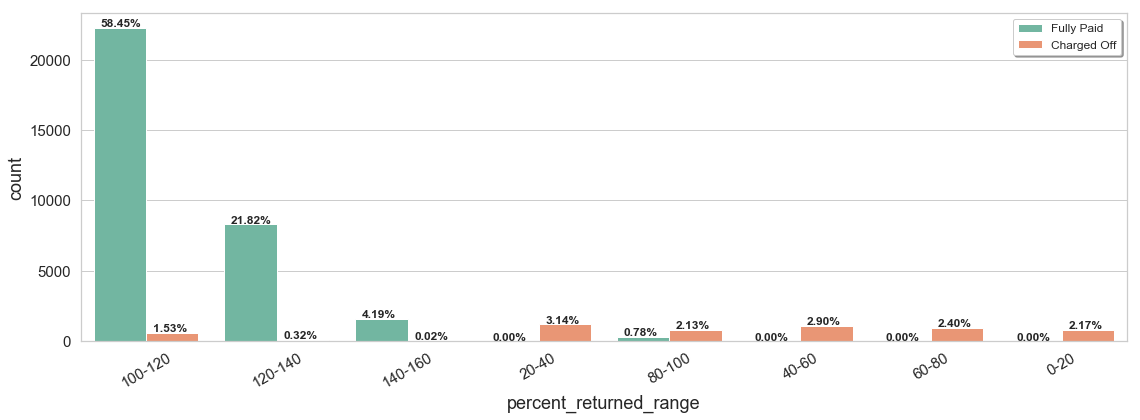

In [224]:
bivariate(df,col='percent_returned_range',hue='loan_status')

In [225]:
#percent_returned_range column is derived by taking ratio of total amount returned (Principal/interest or recovery)
#divided by total loan amount.
#The above graph displays that people who default they did not return partial or full money upto a maximum of 100% money in 14.6% cases. 
#i.e.the lender lost minimum of 20% money in such cases.
#past repayment history of borrower should be seen to get this idea.

### <font color=black>Bivariate analysis- Loan amount across various segments and two loan Status

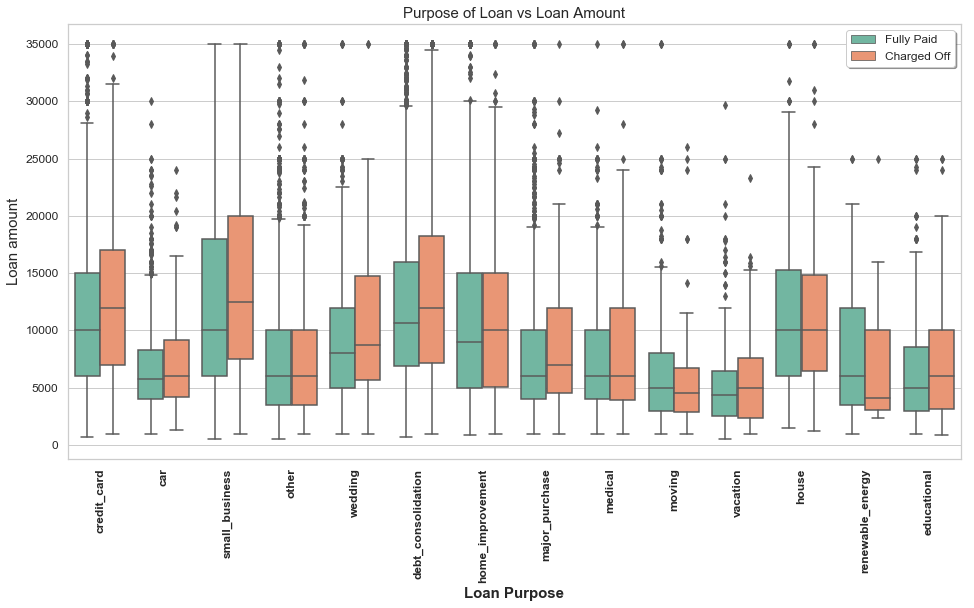

In [226]:
plt.figure(figsize=(16,8))
sns.boxplot(data =df, x='purpose', y='loan_amnt', hue ='loan_status',palette="Set2")
plt.legend(loc='upper right',shadow='True',fontsize=12) 
plt.title('Purpose of Loan vs Loan Amount',fontsize=15)
plt.xticks(rotation=90,fontsize=12,weight='bold')
plt.yticks(fontsize=12)
plt.xlabel("Loan Purpose",fontsize=15,weight='bold')
plt.ylabel("Loan amount",fontsize=15)
plt.show()

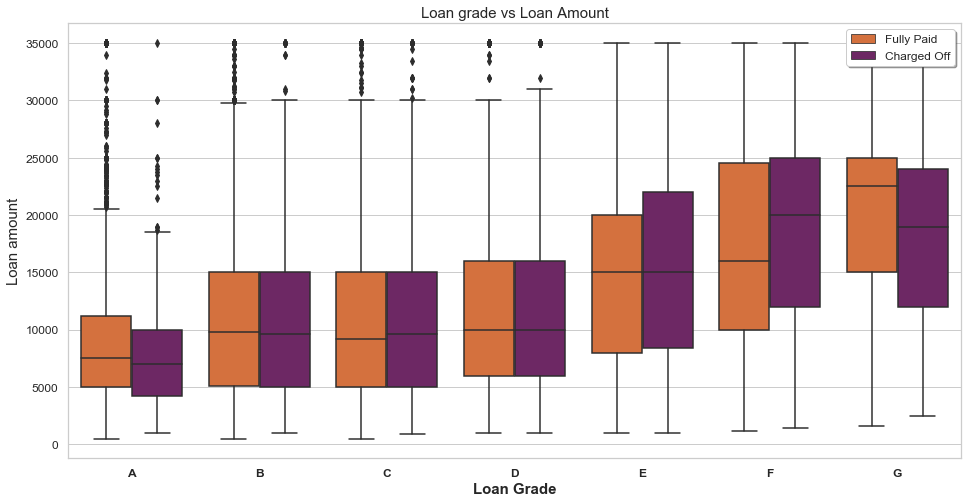

In [227]:
plt.figure(figsize=(16,8))
sns.boxplot(data =df, x='grade', y='loan_amnt', hue ='loan_status',order=["A", "B", "C","D","E","F","G"],palette="inferno_r")
plt.legend(loc='upper right',shadow='True',fontsize=12) 
plt.title('Loan grade vs Loan Amount',fontsize=15)
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12)
plt.xlabel("Loan Grade",fontsize=15,weight='bold')
plt.ylabel("Loan amount",fontsize=15)
plt.show()

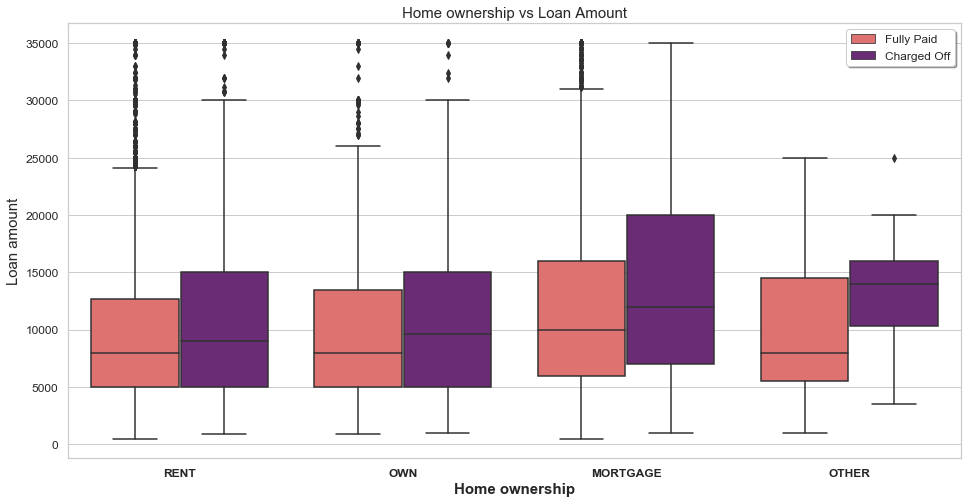

In [228]:
plt.figure(figsize=(16,8))
sns.boxplot(data =df, x='home_ownership', y='loan_amnt', hue ='loan_status',palette="magma_r")
plt.legend(loc='upper right',shadow='True',fontsize=12) 
plt.title('Home ownership vs Loan Amount',fontsize=15)
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12)
plt.xlabel("Home ownership",fontsize=15,weight='bold')
plt.ylabel("Loan amount",fontsize=15)
plt.show()

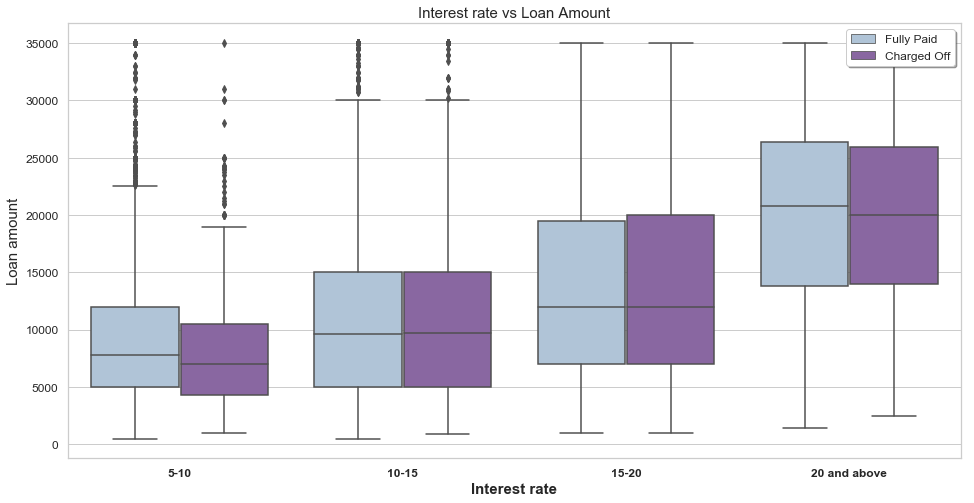

In [229]:
plt.figure(figsize=(16,8))
sns.boxplot(data =df, x='int_rate_range', y='loan_amnt', hue ='loan_status',palette="BuPu")
plt.legend(loc='upper right',shadow='True',fontsize=12) 
plt.title('Interest rate vs Loan Amount',fontsize=15)
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12)
plt.xlabel("Interest rate",fontsize=15,weight='bold')
plt.ylabel("Loan amount",fontsize=15)
plt.show()

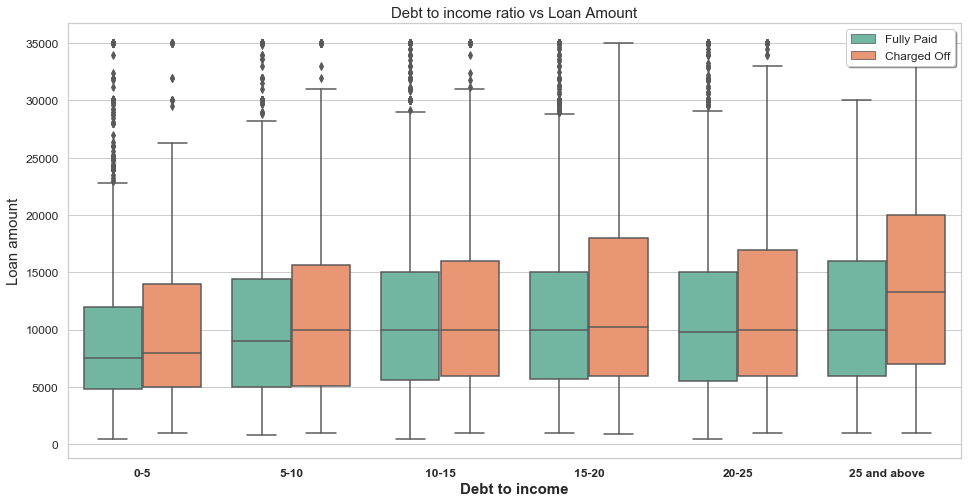

In [230]:
plt.figure(figsize=(16,8))
sns.boxplot(data =df, x='dti_range', y='loan_amnt', hue ='loan_status',palette="Set2")
plt.legend(loc='upper right',shadow='True',fontsize=12) 
plt.title('Debt to income ratio vs Loan Amount',fontsize=15)
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12)
plt.xlabel("Debt to income",fontsize=15,weight='bold')
plt.ylabel("Loan amount",fontsize=15)
plt.show()

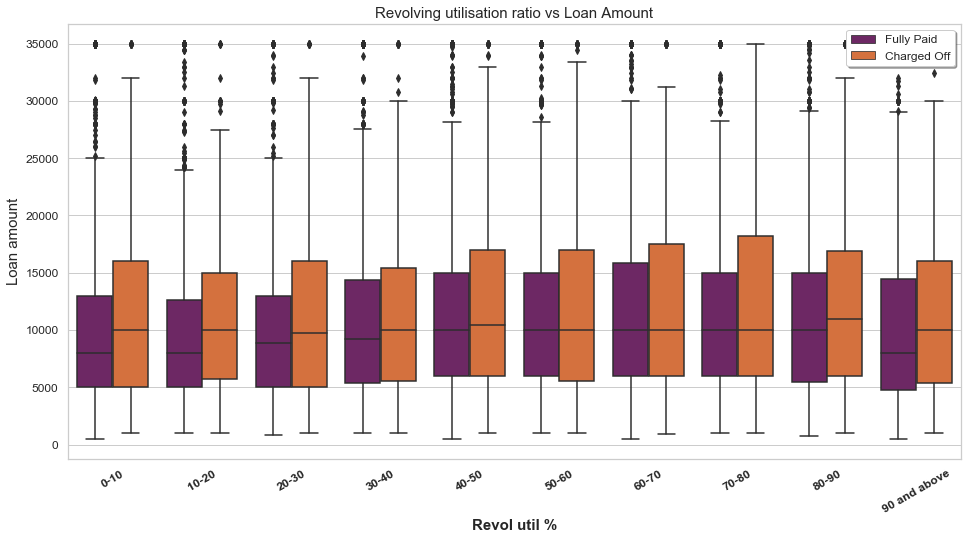

In [231]:
plt.figure(figsize=(16,8))
sns.boxplot(data =df, x='revol_util_range', y='loan_amnt', hue ='loan_status',palette="inferno")
plt.legend(loc='upper right',shadow='True',fontsize=12) 
plt.title('Revolving utilisation ratio vs Loan Amount',fontsize=15)
plt.xticks(rotation=30,fontsize=12,weight='bold')
plt.yticks(fontsize=12)
plt.xlabel("Revol util %",fontsize=15,weight='bold')
plt.ylabel("Loan amount",fontsize=15)
plt.show()

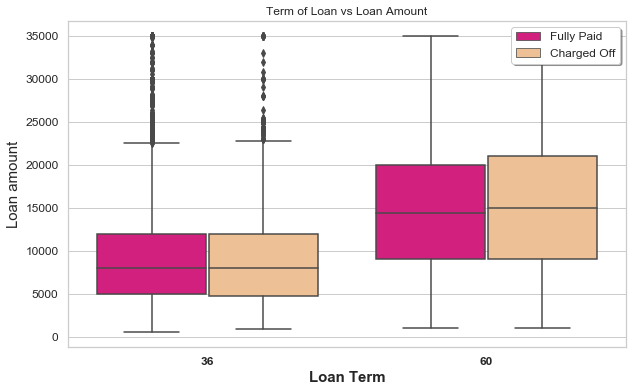

In [232]:
plt.figure(figsize=(10,6))
sns.boxplot(data =df, x='term_mths', y='loan_amnt', hue ='loan_status',palette="Accent_r")
plt.legend(loc='upper right',shadow='True',fontsize=12) 
plt.title('Term of Loan vs Loan Amount')
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12)
plt.xlabel("Loan Term",fontsize=15,weight='bold')
plt.ylabel("Loan amount",fontsize=15)
plt.show()

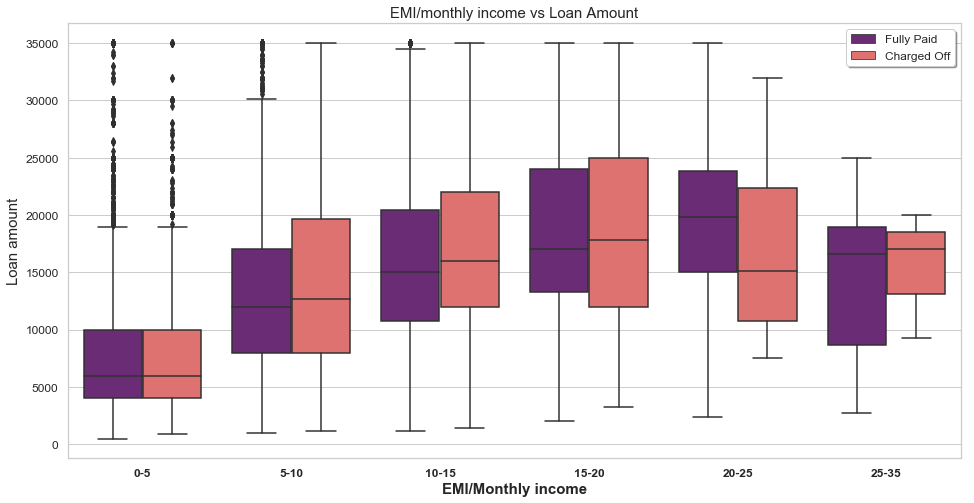

In [233]:
plt.figure(figsize=(16,8))
sns.boxplot(data =df, x='emi_per_of_inc_range', y='loan_amnt', hue ='loan_status',palette="magma")
plt.legend(loc='upper right',shadow='True',fontsize=12) 
plt.title('EMI/monthly income vs Loan Amount',fontsize=15)
plt.xticks(rotation=0,fontsize=12,weight='bold')
plt.yticks(fontsize=12)
plt.xlabel("EMI/Monthly income",fontsize=15,weight='bold')
plt.ylabel("Loan amount",fontsize=15)
plt.show()

In [234]:
df_topdef_states=round(100*df_coff.groupby(['addr_state']).addr_state.count().sort_values(ascending=False)/len(df_coff.index),2).head(10)

In [235]:
#df.to_csv("final.csv")

<font color=purple>**Creating a dataframe having data of each state with Fully paid and Charged off loans.**

In [236]:
df_states = pd.crosstab(df.addr_state,df.loan_status)
df_states.head()                

loan_status,Charged Off,Fully Paid
addr_state,,
AK,14,63
AL,54,378
AR,27,205
AZ,121,716
CA,1111,5737


In [237]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, AK to WY
Data columns (total 2 columns):
Charged Off    50 non-null int64
Fully Paid     50 non-null int64
dtypes: int64(2)
memory usage: 1.2+ KB


In [238]:
df_states.reset_index(inplace=True)

In [239]:
df_states['Total']=df_states['Charged Off']+df_states['Fully Paid']

In [240]:
df_states['Charged Off %']=round(100*df_states['Charged Off']/df_states['Total'],2)
df_states['Fully Paid %']=round(100*df_states['Fully Paid']/df_states['Total'],2)

In [241]:
df_states.sort_values(by='Charged Off %',ascending=False).head()

loan_status,addr_state,Charged Off,Fully Paid,Total,Charged Off %,Fully Paid %
28,NE,3,2,5,60.00,40.00
32,NV,107,367,474,22.57,77.43
40,SD,12,50,62,19.35,80.65
0,AK,14,63,77,18.18,81.82
9,FL,496,2246,2742,18.09,81.91


In [242]:
#States with highest default rates- NE,NV,SD,AK,FL

In [243]:
#df_states.to_csv("States data.csv")
#Tableau map created to visualise state wise default

In [244]:
#Conclusion:
#Variables indicating default
#Loan amount
#Loan grade
#Open account/Open credit lines
#Loan Purpose
#Annual income
#Home ownership
#DTI ratio (For other than requested loans)
#EMI/ monthly income ratio (For requested loan)
#Inquiries made in last 6 months
#Past loans repayment history (Actual loan term and amount repaid)
